# COGS 108 - Using Machine Learning to Predict Alzheimer's

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Shivangi Gupta
- Joseph Hwang
- Zijun Yang
- Johnny Gonzales
- Tanishq Singh Rathore

# Abstract

Please write one to four paragraphs that describe a very brief overview of why you did this, how you did, and the major findings and conclusions.

# Research Question

Utilizing clinical MRI Data and personal details of an individual, can we predict via machine learning model whether an individual will have an onset of Alzheimer's disease? Features the model will be trained on include variables such as Mini Mental State Examination (MMSE), visit number, Clinical Dementia Rating (CDR), gender, age, years of education, socioeconomic status, Estimated total intracranial volume (eTIV), Normalize Whole Brain Volume (nWBV), and Atlas Scaling Factor (ASF).

## Background and Prior Work

Advancements in healthcare, improvements in living conditions, and
breakthroughs in medicine have collectively contributed to longer life
expectancies worldwide; simultaneously, developed countries are also
experiencing declining fertility
rates.[<sup>1</sup>](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4255510/)
The combination of these two circumstances has resulted in the
proportion of older people within populations to steadily increase. The
World Health Organization (WHO) reported that “in 2020, the number of
people aged 60 and older outnumbered children younger than 5
years”.[<sup>2</sup>](https://www.who.int/news-room/fact-sheets/detail/ageing-and-health)
In addition, they also state that “between 2015 and 2050, the proportion
of the world’s population over 60 years will nearly double from 12% to
22%”. As a result, it is reasonable that we examine common health
conditions associated with older age, one being Alzheimer’s disease.

So what is Alzheimer’s disease? Alzheimer’s disease is a progressive
neurodegenerative brain disorder that impairs memory and cognitive
functions. It is the most common cause of dementia and affects about 6.5
million people in the United States who are aged 65 and
older.[<sup>3</sup>](https://www.mayoclinic.org/diseases-conditions/alzheimers-disease/symptoms-causes/syc-20350447)
At the moment, there are no cures for the disease but medicines may
improve or slow the progression of
symptoms.[<sup>3</sup>](https://www.mayoclinic.org/diseases-conditions/alzheimers-disease/symptoms-causes/syc-20350447)
As such, it is our project to create a model that is able to predict
Alzheimer’s disease based on clinical data that include factors that
show risk and progression of the disease.

There are several other projects that have asked similar questions and
approached similar problems for other diseases. For instance, one study
tried to use machine learning methods to predict risk of cardiovascular
disease based on major contributing
factors.[<sup>4</sup>](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10036320/)
Similarly, another paper used machine learning and ranker-based feature
selection methods to predict eye diseases based on
symptoms.[<sup>5</sup>](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9854513/)
Lastly, there was a paper that predicted thyroid disease using selective
features and machine learning
techniques.[<sup>6</sup>](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9405591/)
All three papers seem to have been relatively successful in predicting
the disease based on distinct features. Evidently, training machine
learning models based on datasets which contain factors and indicators
for a given disease is not a novel format of question and method; we
hope to achieve similarly for Alzheimer’s disease.

<u>In-Depth Study Analysis</u>

Our group analyzed two studies published in the National Institute of
Health’s (NIH) journal database. The first study[<sup>7</sup>](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8927715/) employed
machine learning models to predict early-stage Alzheimer's Disease using
Open Access Series of Imaging Studies (OASIS) data, focusing on metrics
like precision, recall, accuracy, and F1-score. The authors, with
backgrounds in technology and health research, aimed to enhance early
diagnosis, potentially lowering Alzheimer's mortality rates. The study
demonstrated that machine learning techniques such as decision trees,
random forests, SVM, gradient boosting, and voting classifiers can
effectively predict early-stage Alzheimer's Disease with an accuracy of
up to 83%. This achievement highlights the critical role of data science
in identifying Alzheimer's at an early phase, leveraging feature
selection and advanced algorithms to enhance diagnostic accuracy. Early
detection is crucial for timely intervention, potentially mitigating the
disease's progression and impact on patients and their families (Kavitha
et al.).

The second study[<sup>8</sup>](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6138240/) titled
“Application of machine learning methods for diagnosis of dementia based
on the 10/66 battery of cognitive function tests in south India”
investigated the use of machine learning for diagnosing dementia in
South India, employing the culturally and educationally fair 10/66
battery of cognitive function tests designed for use in low and
middle-income countries. Through the analysis of neuropsychological
data, demographic information, and normative data, the research applied
Jrip classification algorithm among others, achieving high diagnostic
accuracy. This approach demonstrates the potential to streamline the
diagnostic process, making it quicker and more accessible for clinicians
and patients in India, thereby addressing the significant healthcare
challenge of efficiently identifying dementia in community settings
(Bhagyashree et al).

<u>In-Depth Analysis of Similar Projects</u>

Our group also delved into actual Kaggle projects that are directly
associated with the dataset we’ve chosen to use, delving into EDA and
prediction models using Scikit-Learn and Tensorflow. The first
project[<sup>9</sup>](https://www.kaggle.com/code/shreyaspj/alzheimer-s-analysis-using-mri)
I will discuss starts with an introduction to Alzheimer's disease and
the problem statement of estimating the Clinical Dementia Rating (CDR)
using MRI dataset features. It progresses through data loading and
preprocessing, including null value handling and normalization, and
employs machine learning techniques, specifically mentioning model
training with hyperparameter tuning for XGBClassifier and
GradientBoostingClassifier. The notebook concludes with predictions and
performance evaluation, indicated by confusion matrix and classification
report visualizations, and the model was able to reach a final accuracy
of \~80%.

The second project[<sup>10</sup>](https://www.kaggle.com/code/andrew32bit/predict-alzheimer-disease-sl-and-tf) tried to predict the Clinical Rating of Alzheimer's disease (CRA) by
integrating data loading, visualization, and extensive machine learning,
including the use of TensorFlow for neural network models. It explored
various machine learning models, with a special emphasis on model
training and evaluation, culminating in the finding that the
DecisionTreeClassifier performed the best among the models tested. The
conclusion stressed the need for more data to enhance the precision of
Alzheimer's disease predictions, highlighting the challenge of data
scarcity in achieving accurate diagnostic models.

**References**

1.  [^](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4255510/) Nargund G. (2009) Declining birth rate in Developed Countries: A
     radical policy re-think is required. *Facts, views & vision in
     ObGyn, 1(3), 191–193.*
     [<u>https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4255510/</u>](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4255510/)

2.  [^](https://www.who.int/news-room/fact-sheets/detail/ageing-and-health) World Health Organization. (1 Oct 2022) Ageing and health. *World
     Health Organization*.
     [<u>https://www.who.int/news-room/fact-sheets/detail/ageing-and-health</u>](https://www.who.int/news-room/fact-sheets/detail/ageing-and-health)

3.  [^](https://www.mayoclinic.org/diseases-conditions/alzheimers-disease/symptoms-causes/syc-20350447) Mayo Foundation for Medical Education and Research. (30
     August 2023) Alzheimer’s disease. *Mayo Clinic*.
     [<u>https://www.mayoclinic.org/diseases-conditions/alzheimers-disease/symptoms-causes/syc-20350447</u>](https://www.mayoclinic.org/diseases-conditions/alzheimers-disease/symptoms-causes/syc-20350447)

4.  [^](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10036320/) Peng, M., Hou, F., Cheng, Z., Shen, T., Liu, K., Zhao, C., &
     Zheng, W. (23 Mar 2023) Prediction of cardiovascular disease risk
     based on major contributing features. *Scientific reports, 13(1),
     4778*.
     [<u>https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10036320/</u>](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10036320/)

5.  [^](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9854513/) Marouf, A. A., Mottalib, M. M., Alhajj, R., Rokne, J., &
     Jafarullah, O. (24 Dec 2022) An Efficient Approach to Predict Eye
     Diseases from Symptoms Using Machine Learning and Ranker-Based
     Feature Selection Methods. *Bioengineering (Basel, Switzerland),
     10(1), 25*.
     [<u>https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9854513/</u>](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9854513/)

6.  [^](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9405591/) Chaganti, R., Rustam, F., De La Torre Díez, I., Mazón, J. L. V.,
     Rodríguez, C. L., & Ashraf, I. (13 Aug 2022). Thyroid Disease
     Prediction Using Selective Features and Machine Learning
     Techniques. *Cancers, 14(16), 3914*.
     [<u>https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9405591/</u>](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9405591/)

7.  [^](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8927715/) Kavitha C, Mani V, Srividhya SR, Khalaf OI, Tavera Romero CA.
     Early-Stage Alzheimer's Disease Prediction Using Machine Learning
     Models. Front Public Health. 2022 Mar 3;10:853294. doi:
     10.3389/fpubh.2022.853294. PMID: 35309200; PMCID: PMC8927715.
     [<u>https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8927715/</u>](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8927715/)

8.  [^](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6138240/) Bhagyashree SIR, Nagaraj K, Prince M, Fall CHD, Krishna M.
     Diagnosis of Dementia by Machine learning methods in
     Epidemiological studies: a pilot exploratory study from south
     India. Soc Psychiatry Psychiatr Epidemiol. 2018 Jan;53(1):77-86.
     doi: 10.1007/s00127-017-1410-0. Epub 2017 Jul 11. PMID: 28698926;
     PMCID: PMC6138240.
     [<u>https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6138240/</u>](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6138240/)

9.  [^](https://www.kaggle.com/code/shreyaspj/alzheimer-s-analysis-using-mri) Reddy, Shreyas. 2021. Alzheimer's analysis using MRI, February
     8, 2024.
     [<u>https://www.kaggle.com/code/shreyaspj/alzheimer-s-analysis-using-mri</u>](https://www.kaggle.com/code/shreyaspj/alzheimer-s-analysis-using-mri)

10. [^](https://www.kaggle.com/code/andrew32bit/predict-alzheimer-disease-sl-and-tf) Andrew. 2017. Predict alzheimer disease sl and tf, February 8, 2024.
     [<u>https://www.kaggle.com/code/andrew32bit/predict-alzheimer-disease-sl-and-tf</u>](https://www.kaggle.com/code/andrew32bit/predict-alzheimer-disease-sl-and-tf)

# Hypothesis


Our project's hypothesis is the following: "It is possible to predict the onset of Alzheimers based on the combination of (1) clinical data* and (2) personal features such as gender, age, years of education, and socioeconomic status." We believe that we will be able to successfully train a model that is able to predict the onset of Alzheimer's disease because, as mentioned in the background portion of the proposal, there has been numerous successful machine learning models trained on clinical data to predict the onset of a disease. The clinical data provide variables that capture both the cognitive and structural changes associated with the disease's progression. Incorporating personal features such as gender and age in the prediction model is justified by extensive research indicating that these factors can influence the risk and progression rate of Alzheimer's disease. Together, we believe that this will be enough data to train a model to predict the onset of Alzheimer's disease.

*Clinical data include Mini Mental State Examination (MMSE), visit number, Clinical Dementia Rating (CDR), Estimated total intracranial volume (eTIV), Normalize Whole Brain Volume (nWBV), and the Atlas Scaling Factor (ASF)

## Data overview

- Dataset #1
  - Dataset Name: OASIS-2: Longitudinal MRI Data in Nondemented and Demented Older Adults
  - Link to the dataset:https://www.oasis-brains.org/#data
  - Number of observations: 373
  - Number of variables: 15

The dataset provided by The Open Access Series of Imaging Studies (OASIS) contains a collection of 150 subjects aged 60 to 96. Each subject was scanned on 2 or more visits, separated by one year for a total of 373 imaging sessions. All subjects were right-handed and included both men and women. 72 subjects were charaterized as nondemented throughout the study. 64 subjects subjects were characterized as demented at their initial vists and remained so for subsequent scans. Lastly, 14 subjects were characterized as nondemented at their initial vist but were subsequently characterized as demented in later visits. Important variables are years of education (EDUC), socioeconomic status (SES; 1 to 5), mini mental state examination (MMSE score), clinical dementia rating (CDR rating scale), estimated total intracranial volume (eTIV), normalize whole brain volume(nWBV), and atlas scaling factor (ASF). 

The variables may be proxies for Alzheimers/cognitive state (conjecture):
- __EDUC__: Represents years of education which may proxy for cognitive reserve. Higher education levels may result in better cognitive function and reduced risk of dementia. 
- __SES__: Ranging from 1 to 5, is a proxy for income, education level, and occupation, which represents environmental influences on cognitive health. 
- __MMSE__: A widely used screening tool for cognitive impairment. Scores range from 1 to 30 with higher scores indicating better cognitive function. The examination assesses domains such as orientation, memory, attention, and language. 
- __CDR__: CDR scale is also commonly used to assess severity of dementia symptoms. The scale ranges from 0 to 3 where 0 indicates no dementia, 0.5 is questionable dementia, 1 is mild dementia, 2 is moderate dementia, and 3 is severe dementia.
- __eTIV__: Indicates the total volume inside the skull (including brain tissue, cerebrospinal fluid, etc.). It is measured in cubic centimeters (cc) and can help establish baseline brain size. Decrease/varying sizes may proxy for cognitive function and Alzheimer's risk.
- __nWBV__: Represents the volume of the brain normalized to the subject's eTIV. It is expressed as a percentage, reflecting the proportion of the brain occupying the eTIV (nWBV = brain volume / eTIV). Changes in nWBV may be indicative of brain atrophy which is a common feature of Alzheimer's and dementia.
- __ASF__: A scaling factor used in brain imaging to adjust for individual differences in brain size and shape. It accounts for variability in brain morphology allowing for accurate comparisons of brain structures.

The dataset provided by OASIS is relatively clean and organized. However, some cleaning may be required, such as changing M/F and group to numeric values, dropping columns such as MRI ID, Visit, and Hand which will not be used in our predictions. All of this will be done by manipulating the dataframe. 

# Data

### Setup

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [5]:
df = pd.read_csv('oasis_longitudinal.csv')
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB
None


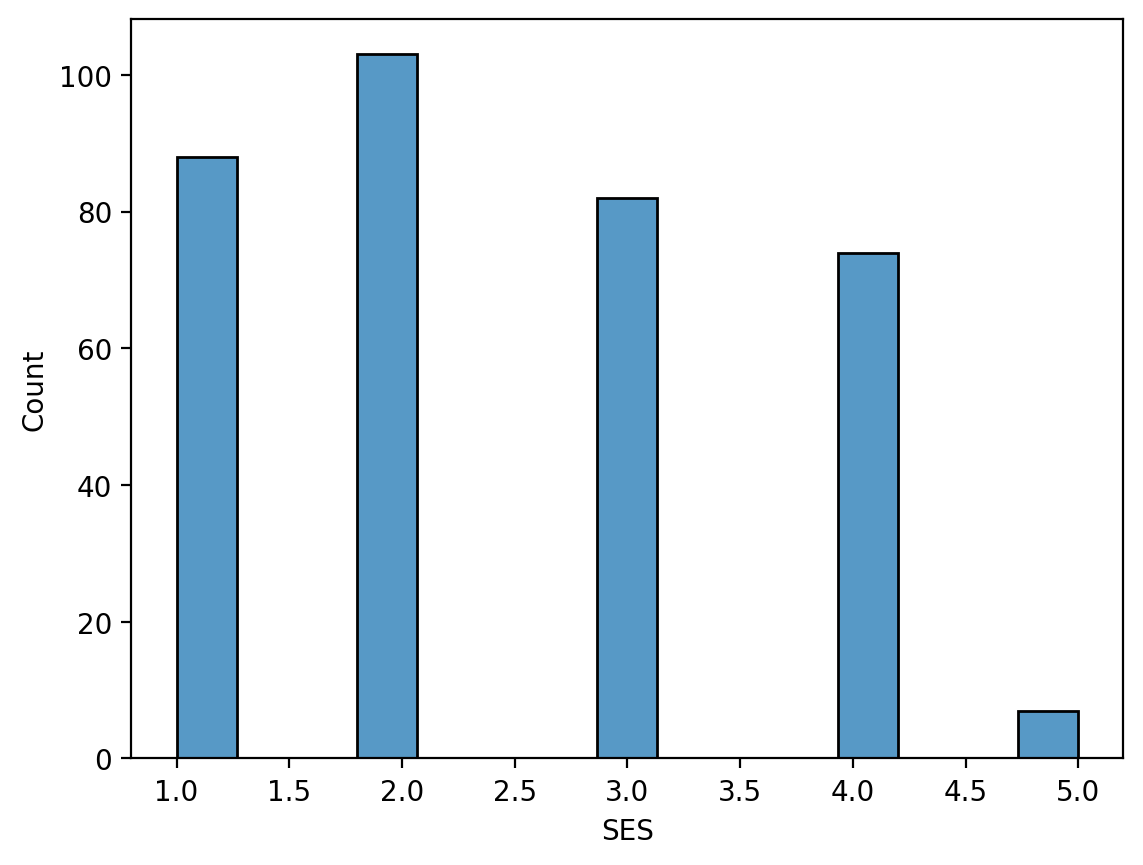

In [7]:
# slightly skewed distribution of SES
sns.histplot(df['SES'].dropna(), kde=False)
plt.show()

In [8]:
df['SES'].fillna(df['SES'].median(), inplace=True) # impute missing socioeconomic status columns using median

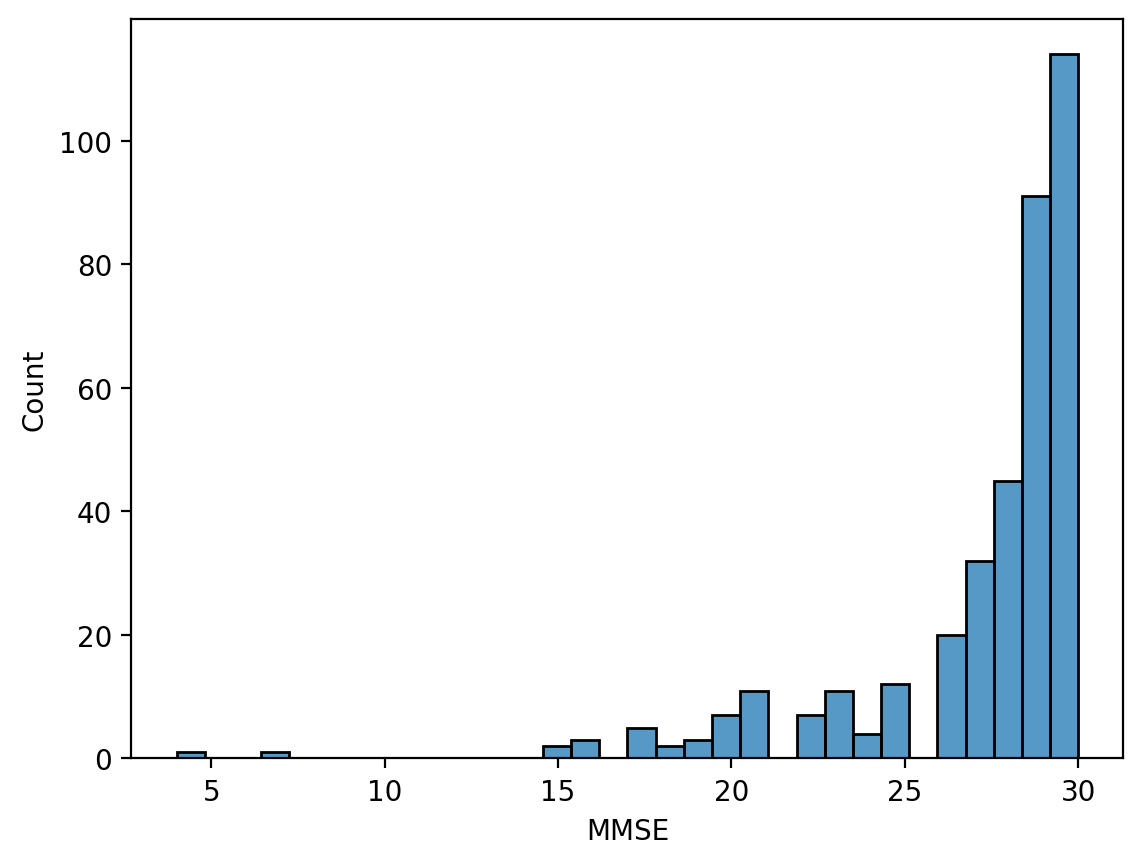

In [9]:
# left-skewed distribution of MMSE
sns.histplot(df['MMSE'].dropna(), kde=False)
plt.show()

In [10]:
df['MMSE'].fillna(df['MMSE'].median(), inplace=True) # impute missing MMSE columns using the median

### Ensure no more Missing Values

In [11]:
df['SES'].isna().sum()

0

In [12]:
df['MMSE'].isna().sum()

0

In [13]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

## Data Cleaning

Our data cleaning approach was quite straightforward. Once we imputed the missing values in the 'SES' and 'MMSE' columns using the medians because of their non-normal distributions, we simply had to ensure our relevant columns were of the correct data type, encoded numerically, and renamed for easier understanding. We chose to use a subset of the data, only subjects' first visits as that is the most appropriate for our prediction task for determing the early onset of Alzheimers/Dementia based on an initial visit. Then, we renamed the 'M/F' column and encoded it to be binary, updated the target variable, 'Group,' to have binary values of (1,0) representing the final categorization of Demented or Nondemented, respectively. Lastly, we dropped extraneous columns such as 'Hand' and 'MRI ID' that will not be used in our prediction models.

In [14]:
df['Group'].unique() #'Converted' are individuals who did not initially have dementia but later developed dementia

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [15]:
pd.options.mode.copy_on_write = True

#Only use date from subjects' first visits
df = df.loc[df['Visit']==1]

#Convert M/F to numeric values and rename
df['Gender'] = df['M/F'].map({'F': 0, 'M': 1})

#Change 'Converted' to 'Demented'
df['Group'] = df['Group'].replace('Converted', 'Demented')

#Convert Group to numeric values (these are our target variables); 1 = dementia, 2 = no dementia
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0])

#Drop variables that will not be used in predictions
df = df.drop(['MRI ID', 'Visit', 'Hand', 'M/F'], axis=1)

df = df.reset_index(drop=True)

In [16]:
df

,Subject ID,Group,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Gender
0,OAS2_0001,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,1
1,OAS2_0002,1,0,75,12,2.0,23.0,0.5,1678,0.736,1.046,1
2,OAS2_0004,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444,0
3,OAS2_0005,0,0,80,12,4.0,28.0,0.0,1689,0.712,1.039,1
4,OAS2_0007,1,0,71,16,2.0,28.0,0.5,1357,0.748,1.293,1
...,...,...,...,...,...,...,...,...,...,...,...,...
145,OAS2_0182,1,0,73,12,2.0,23.0,0.5,1661,0.698,1.056,1
146,OAS2_0183,0,0,66,13,2.0,30.0,0.0,1495,0.746,1.174,0
147,OAS2_0184,1,0,72,16,3.0,24.0,0.5,1354,0.733,1.296,0
148,OAS2_0185,1,0,80,16,1.0,28.0,0.5,1704,0.711,1.030,1


## Check to ensure all Correct Data Types

In [17]:
df.dtypes

Subject ID     object
Group           int64
MR Delay        int64
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
Gender          int64
dtype: object

# Results

As mentioned in our hypothesis, we are exploring and taking into account two types of variables in order to predict Alzheimer's outcome in individuals: (1) personal features and (2) Clinical features. We first perform EDA on the personal features.

## Personal Features EDA

### 1 - Social Economic Status and Clinical Dementia Rate

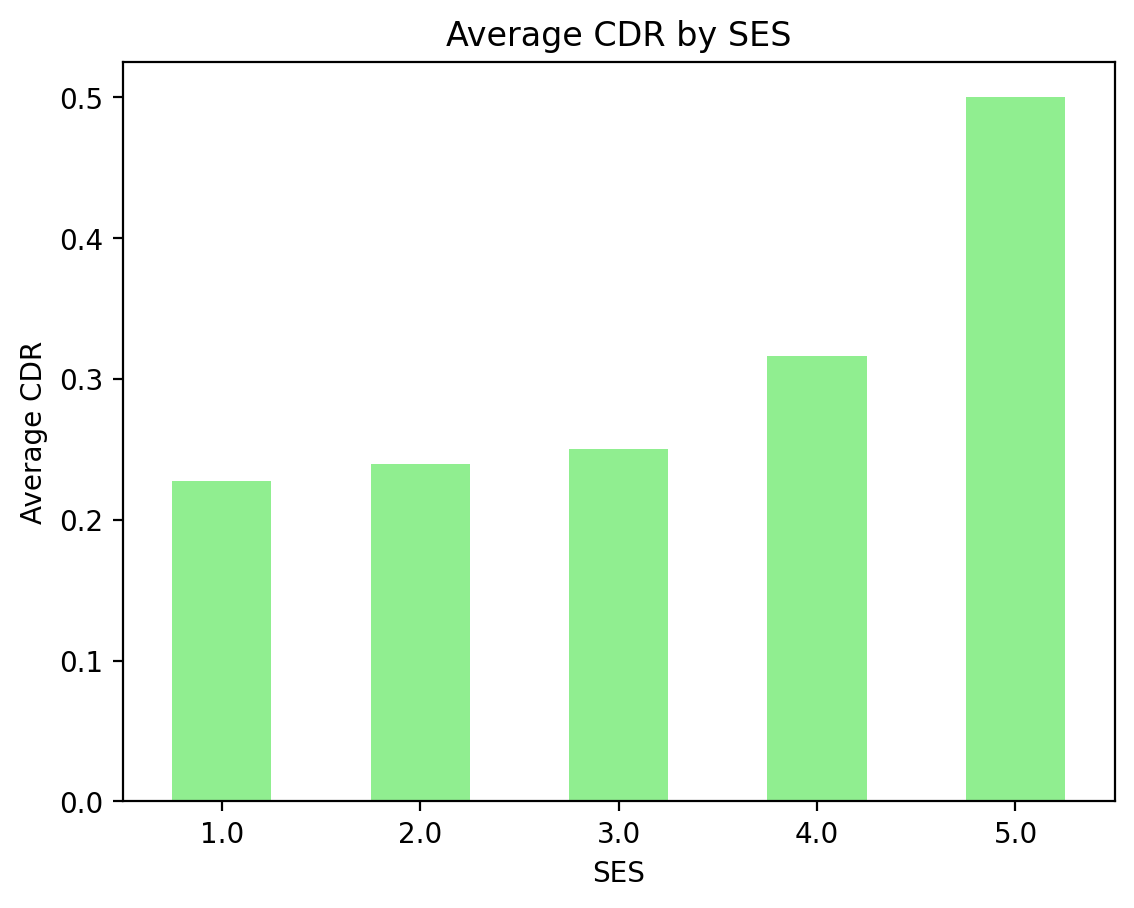

In [18]:
cdr_by_ses = df.groupby('SES')['CDR'].mean()

cdr_by_ses.plot(kind='bar', color='lightgreen')
plt.title('Average CDR by SES')
plt.xlabel('SES')
plt.ylabel('Average CDR')
plt.xticks(ticks=range(len(cdr_by_ses)), labels=cdr_by_ses.index, rotation=0)
plt.show()


Based on the analysis conducted using the provided dataset, our method involved calculating the average Clinical Dementia Rating (CDR) value in respect to each Socioeconomic Status (SES) level. The graphical representation derived from this analysis indicates a trend where higher SES stages are associated with higher average CDR values. This observation may suggest a correlation within this specific dataset where individuals with higher socioeconomic status appear to have higher average levels of clinical dementia severity. It's important to note that this analysis reveals a pattern of association between SES and CDR within the confines of the dataset analyzed and does not imply causation. Further research would be necessary to explore the underlying factors contributing to this correlation and to assess the potential impact of other variables not considered in this initial analysis. There are potential confounding variables, some examples including how individuals with higher SES may have better access to healthcare, greater awareness of dementia/disease, genetic predisposition, and occupational factors resulting in the graph shown above. It is possible that the lower SES groups are being under-represented. 

### 2 - Age and Dementia

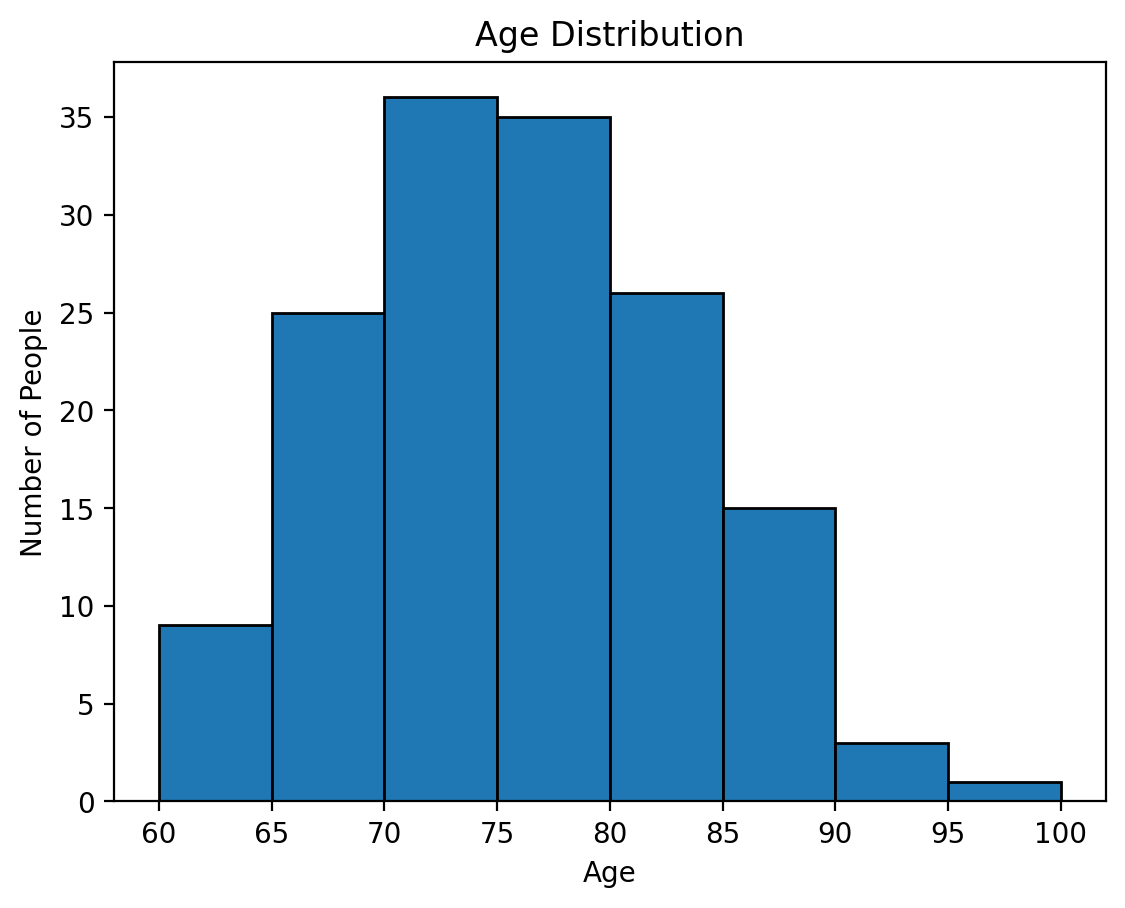

Minimum age: 60
Maximum age: 96


In [19]:
plt.hist(df['Age'], bins=range(60, 101, 5), edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age Distribution')
plt.show()

min_value = df['Age'].min()
max_value = df['Age'].max()

print("Minimum age:", min_value)
print("Maximum age:", max_value)

Above graph shows that the age of subjects range from 60 to 96, which is in-line with our earlier description of the data.

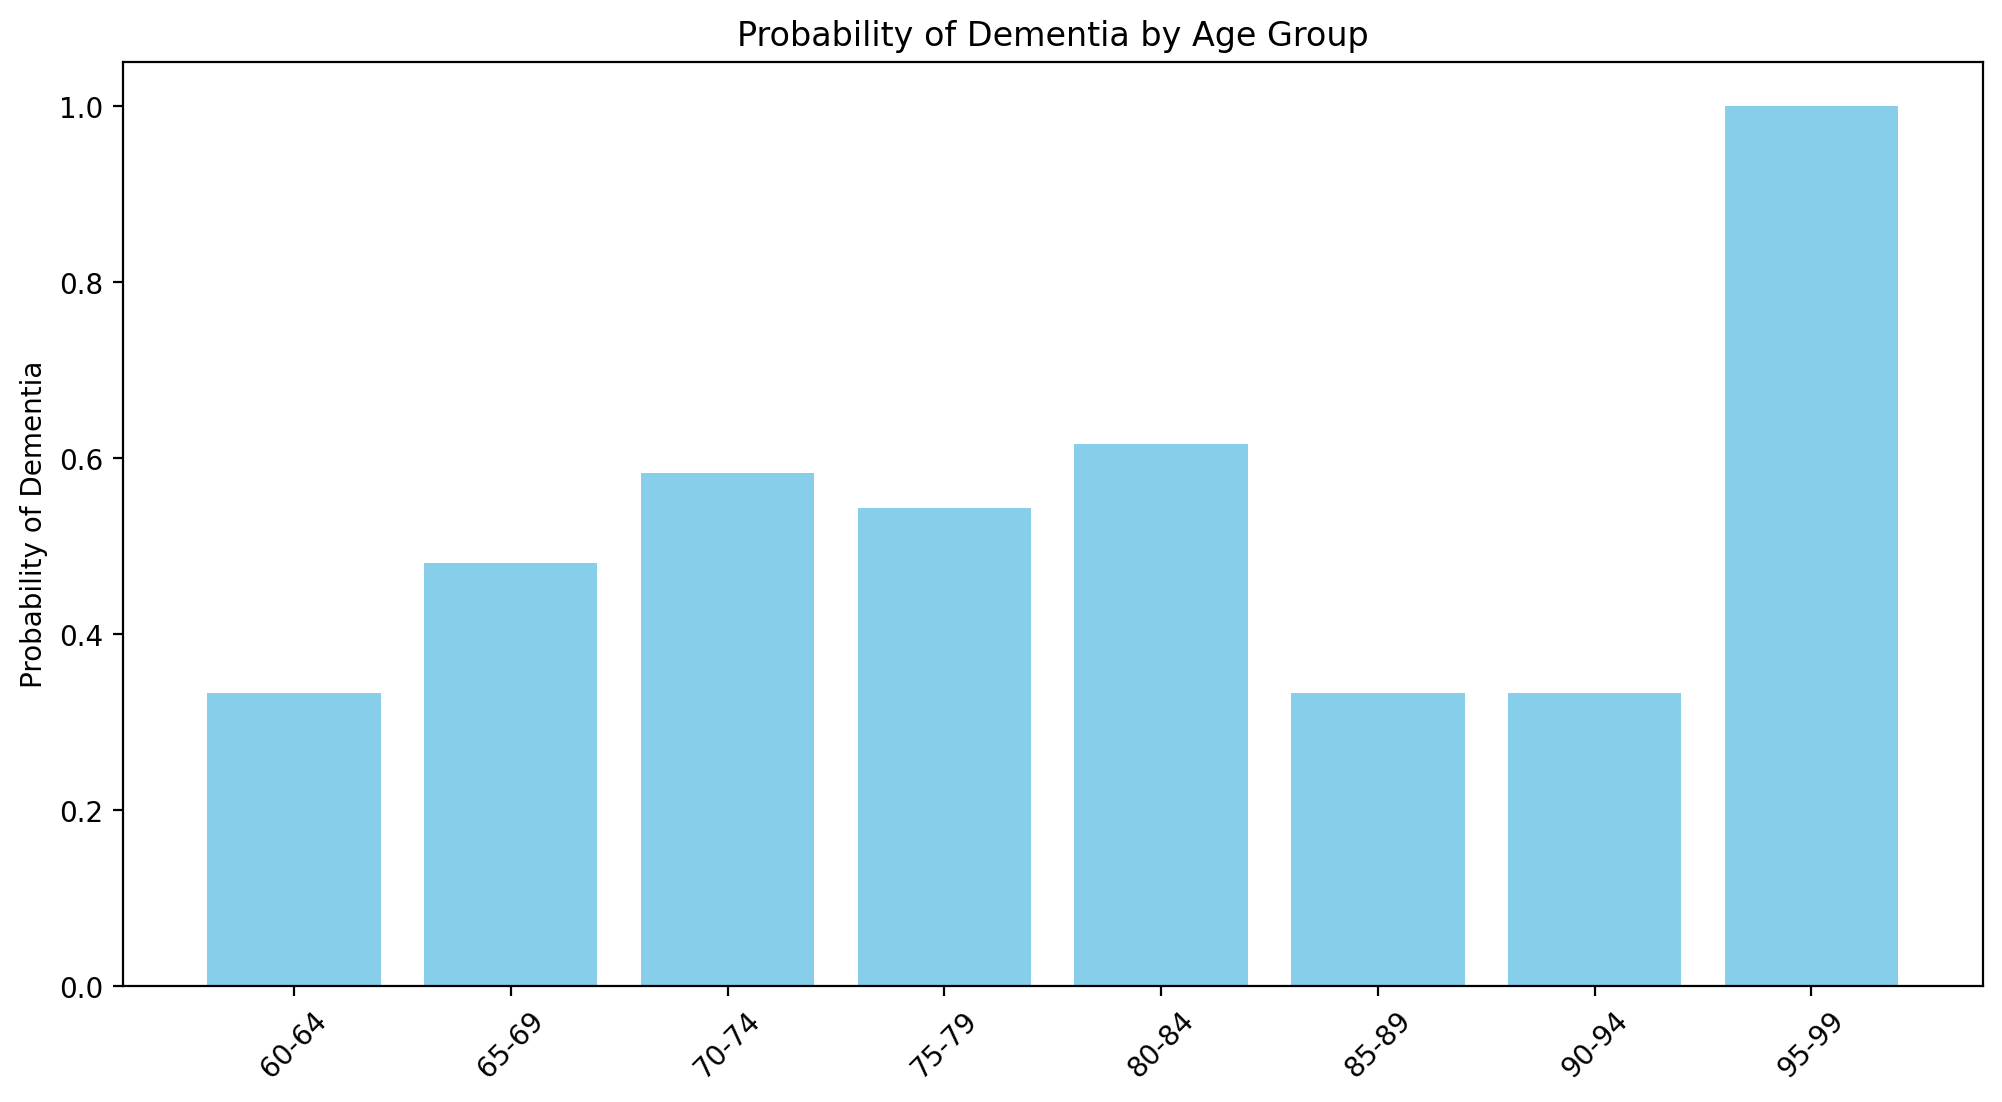

In [20]:
bins = np.arange(60, 101, 5)  # 101 is the upper limit to ensure the maximum age of 96 is included
labels = [f'{i}-{i+4}' for i in range(60, 96, 5)]

# Categorize ages into groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the probability of dementia for each age group
grouped = df.groupby('Age Group')['Group'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(grouped['Age Group'], grouped['Group'], color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('Probability of Dementia')
plt.title('Probability of Dementia by Age Group')
plt.show()


The observed graph depicting the probability of dementia across different age groups (chosen arbitrarily) appears to be within expectation, demonstrating an overall trend where the likelihood of dementia increases with age. However, a notable deviation is observed in the age groups 85-89 and 90-94, where the dementia rates do not continue to increase. This anomaly could potentially be attributed to a significant reduction in the population size within these specific age groups. As shown in the our earlier graph, the chosen age groups are not uniformly distributed so each group will have a differing number of sample size. Smaller group sizes may lead to statistical variations that do not accurately reflect the general trend. 

### 3 - Gender and Dementia

In [21]:
# Calculate gender count, normalize count, and convert it to percent to find percentage distribution of gender.
gender_counts = df['Gender'].value_counts(normalize=True) * 100
print(gender_counts)

Gender
0    58.666667
1    41.333333
Name: proportion, dtype: float64


([<matplotlib.axis.XTick at 0x1618eded0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

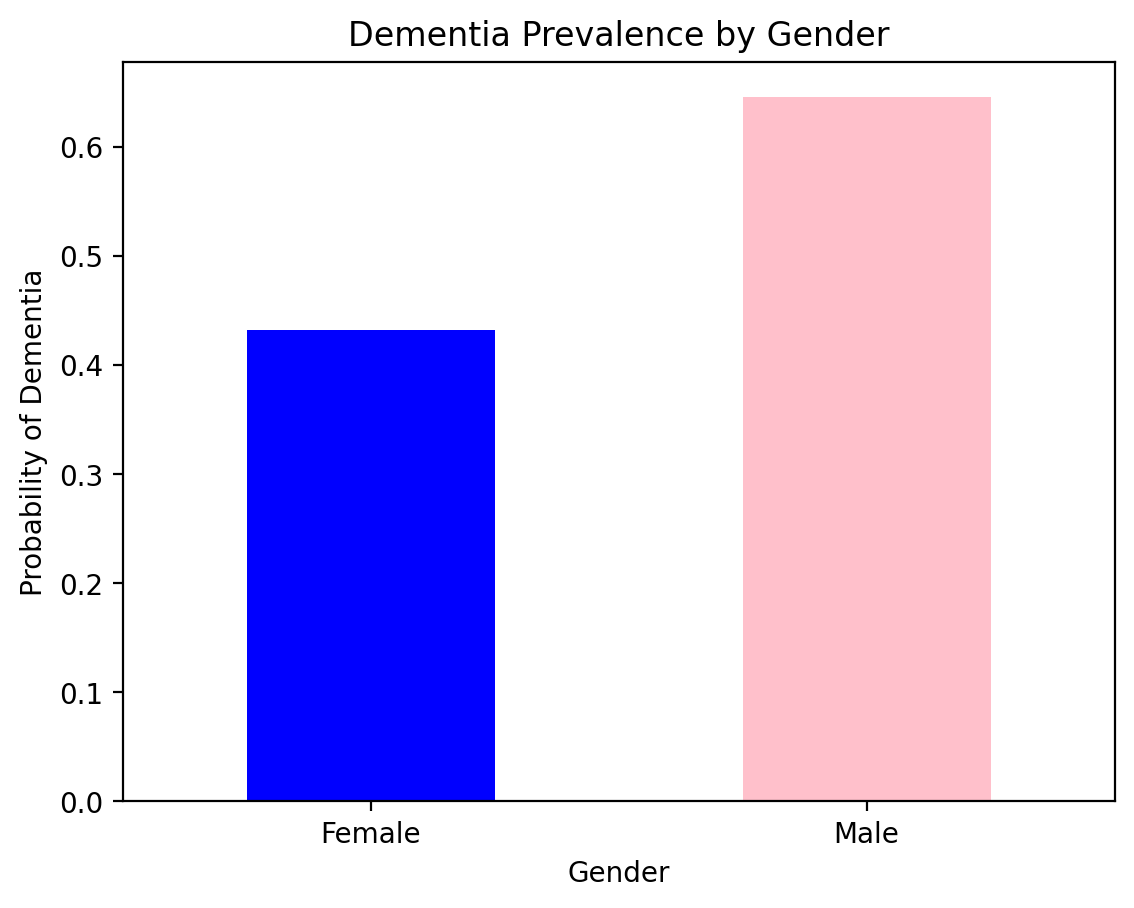

In [22]:
dementia_by_gender = df.groupby('Gender')['Group'].mean()

dementia_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Dementia Prevalence by Gender')
plt.xlabel('Gender')
plt.ylabel('Probability of Dementia')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0) 

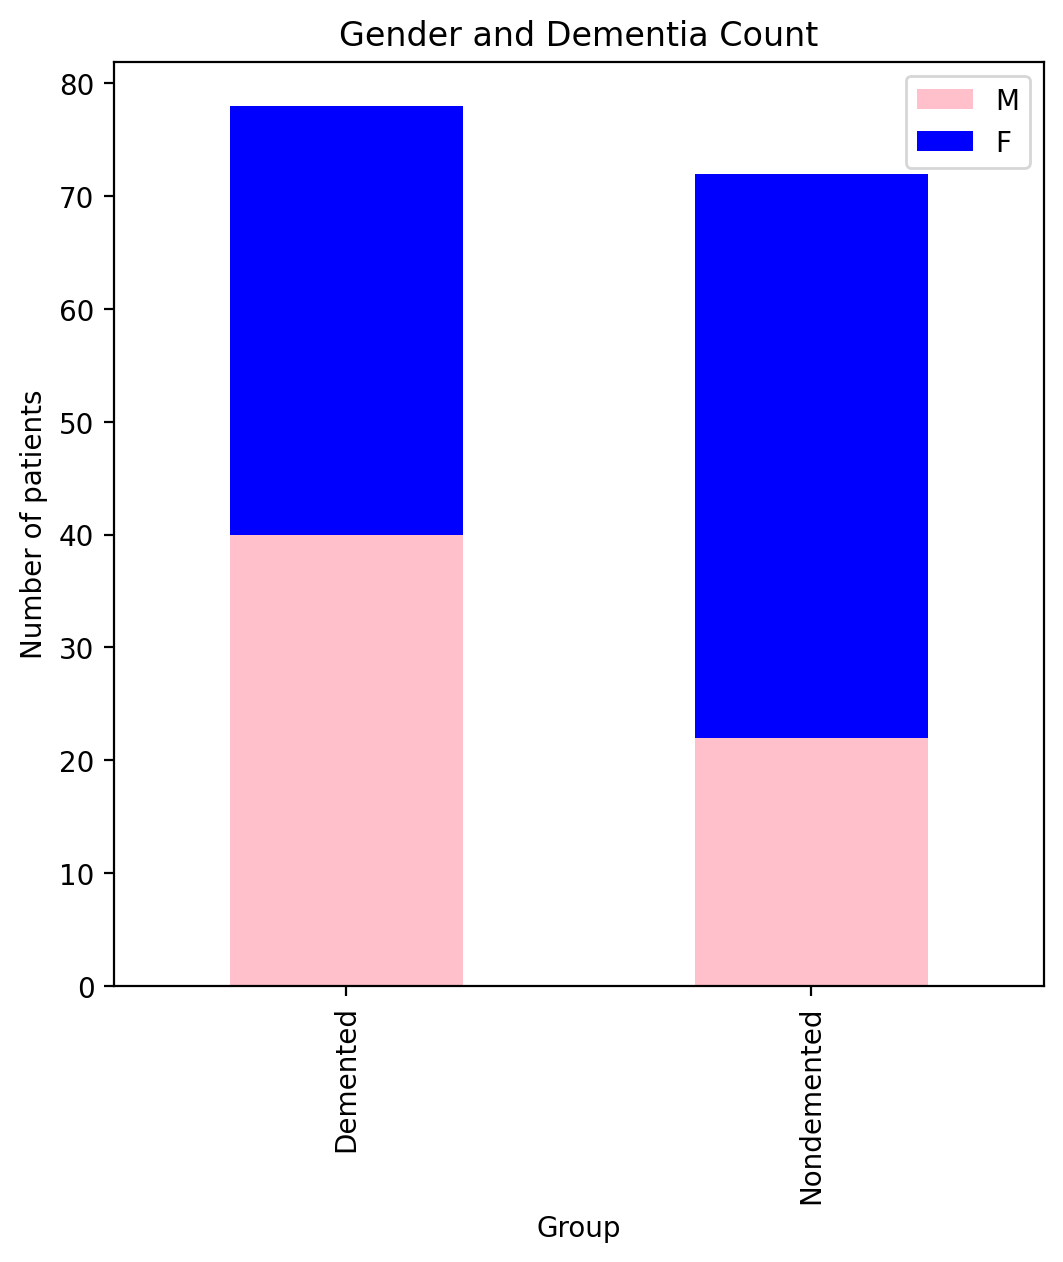

In [23]:
Demented = df[df['Group']==1]['Gender'].value_counts()
Nondemented = df[df['Group']==0]['Gender'].value_counts()
gender_dementia = pd.DataFrame([Demented, Nondemented])
gender_dementia.index = ['Demented', 'Nondemented']
gender_dementia.plot(kind='bar', stacked=True, figsize=(6, 6), color=['pink', 'blue'])
plt.ylabel('Number of patients')
plt.xlabel('Group')
plt.title('Gender and Dementia Count')
plt.legend('MF');

The two above graphs indicate that within the study, males had a greater probability of getting dementia than females.

### 4 - Years of Education and Dementia

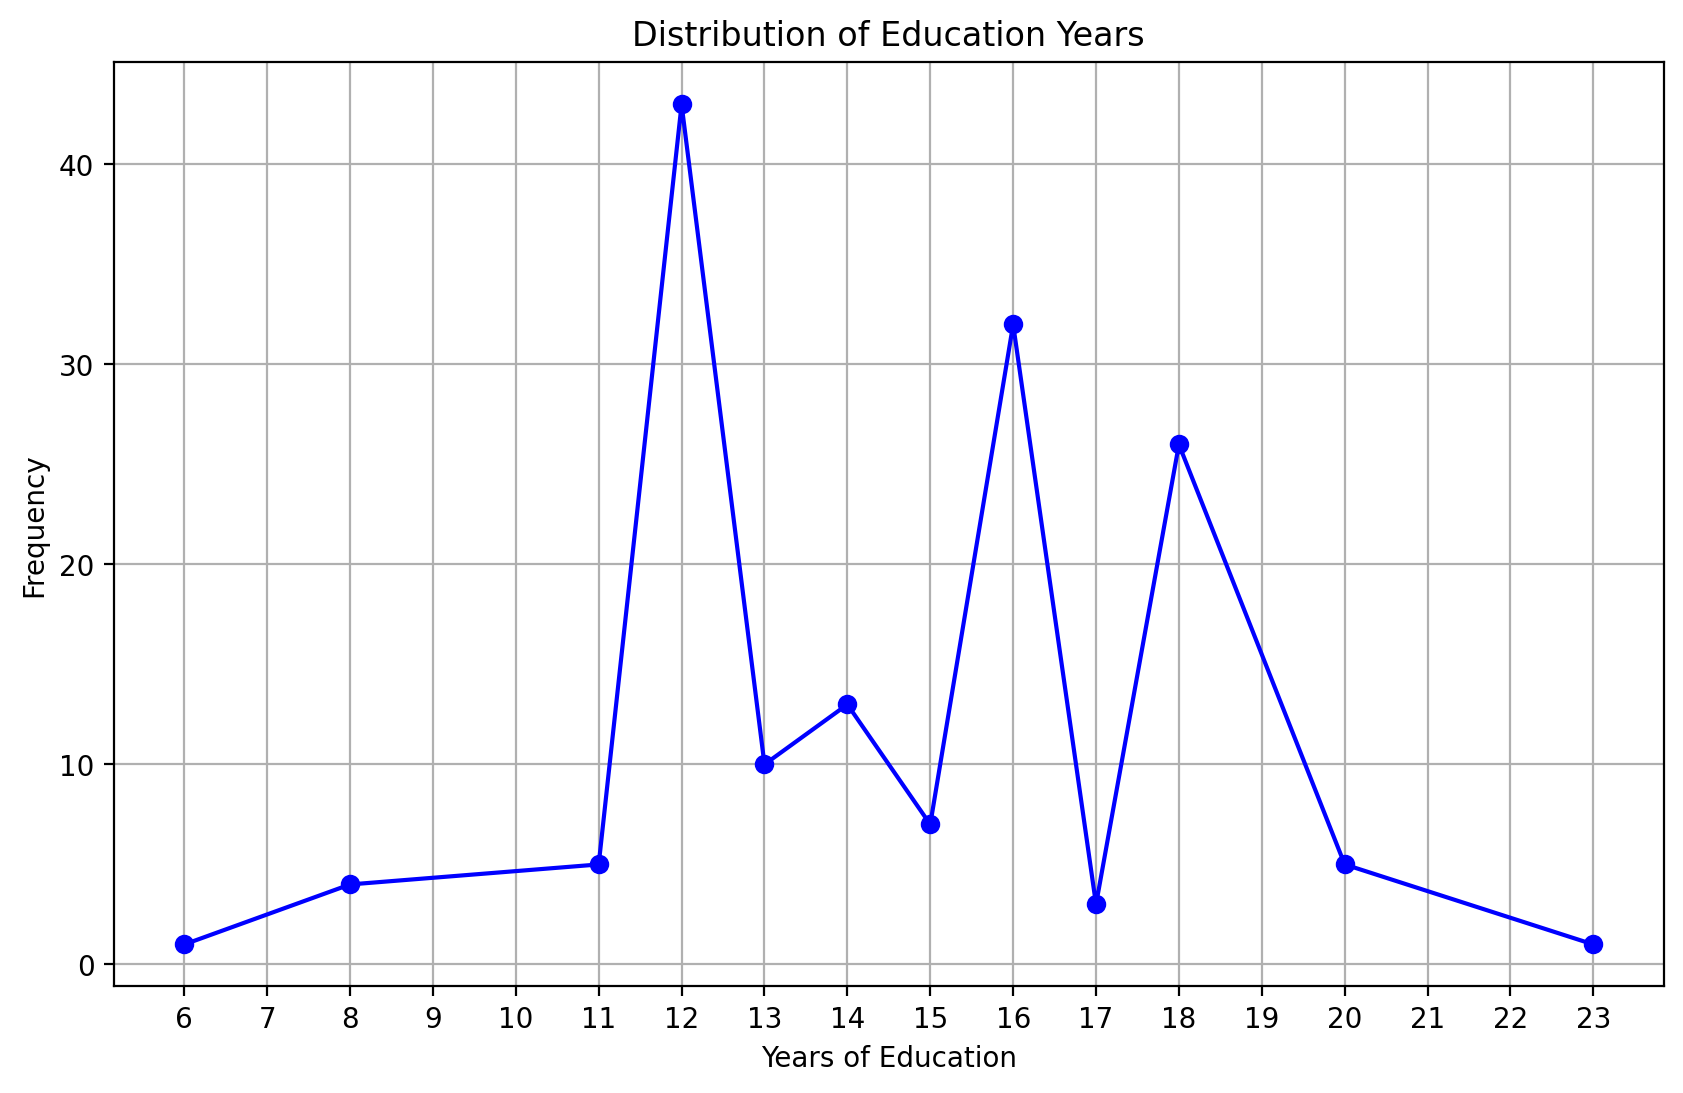

count    150.000000
mean      14.533333
std        2.874714
min        6.000000
25%       12.000000
50%       14.000000
75%       16.000000
max       23.000000
Name: EDUC, dtype: float64


In [24]:
df['EDUC'] = df['EDUC'].astype(int)

education_counts = df['EDUC'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(education_counts.index.to_numpy(), education_counts.values, marker='o', linestyle='-', color='blue')
plt.title('Distribution of Education Years')
plt.xlabel('Years of Education')
plt.ylabel('Frequency')
plt.xticks(np.arange(min(education_counts.index), max(education_counts.index)+1, 1.0)) 
plt.grid(True)
plt.show()
print(df['EDUC'].describe())

Above graph shows the distribution of years of education, with the average being approximately 14-15 years. 

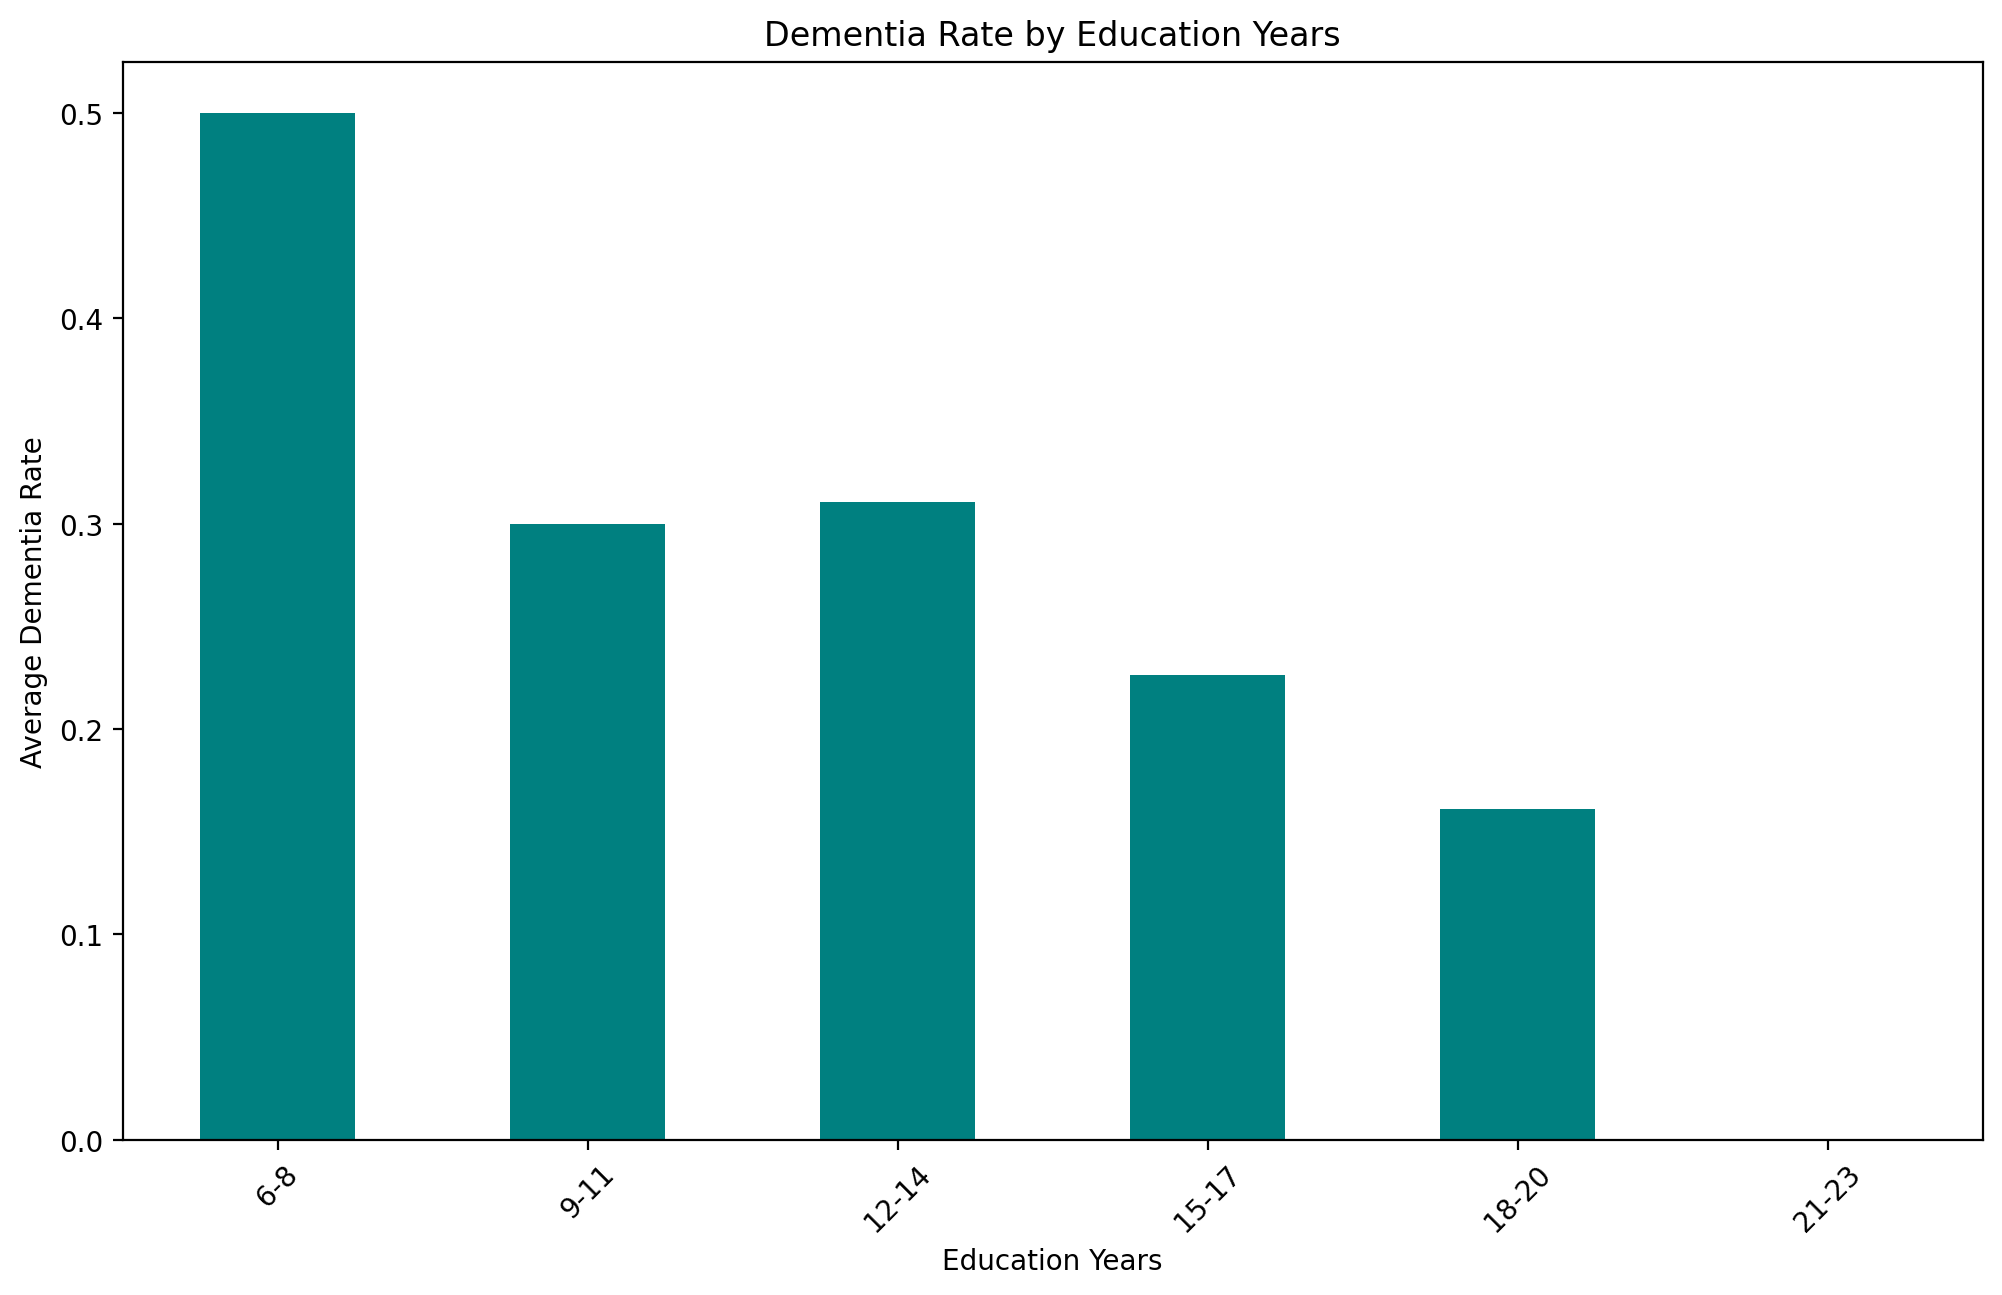

In [25]:
bins = np.arange(df['EDUC'].min(), df['EDUC'].max() + 3, 3)  
labels = [f'{int(i)}-{int(i+2)}' for i in bins[:-1]]

df['EDUC Group'] = pd.cut(df['EDUC'], bins=bins, labels=labels, right=False)


dementia_rate_by_educ = df.groupby('EDUC Group')['CDR'].mean()


plt.figure(figsize=(12, 7))
dementia_rate_by_educ.plot(kind='bar', color='teal')
plt.title('Dementia Rate by Education Years')
plt.xlabel('Education Years')
plt.ylabel('Average Dementia Rate')
plt.xticks(rotation=45)
plt.show()

Based on the graph derived from our analysis, there appears to be a observable trend indicating that the rate of dementia decreases progressively with an increase in years of education. The graph indicates that individuals who have received 6-8 years of education exhibit a higher rate of dementia compared to other educational groups. It is interesting to note that this particular range of educational years typically corresponds to the completion of elementary and middle school education. This may suggest that education may play a crucial role in cognitive health, potentially offering protective benefits that reduce the risk of developing dementia. However, it is equally important to note that there may be other confounding factors as mentioned previously that may impact how the graph is interpreted. Many variables are highly intertwined; for instance, individuals with higher socioeconomic status may be able to afford better health care in addition to more years of education.

##  Clinical Variables EDA

- Group 0: No dementia
- Group 1: With dementia

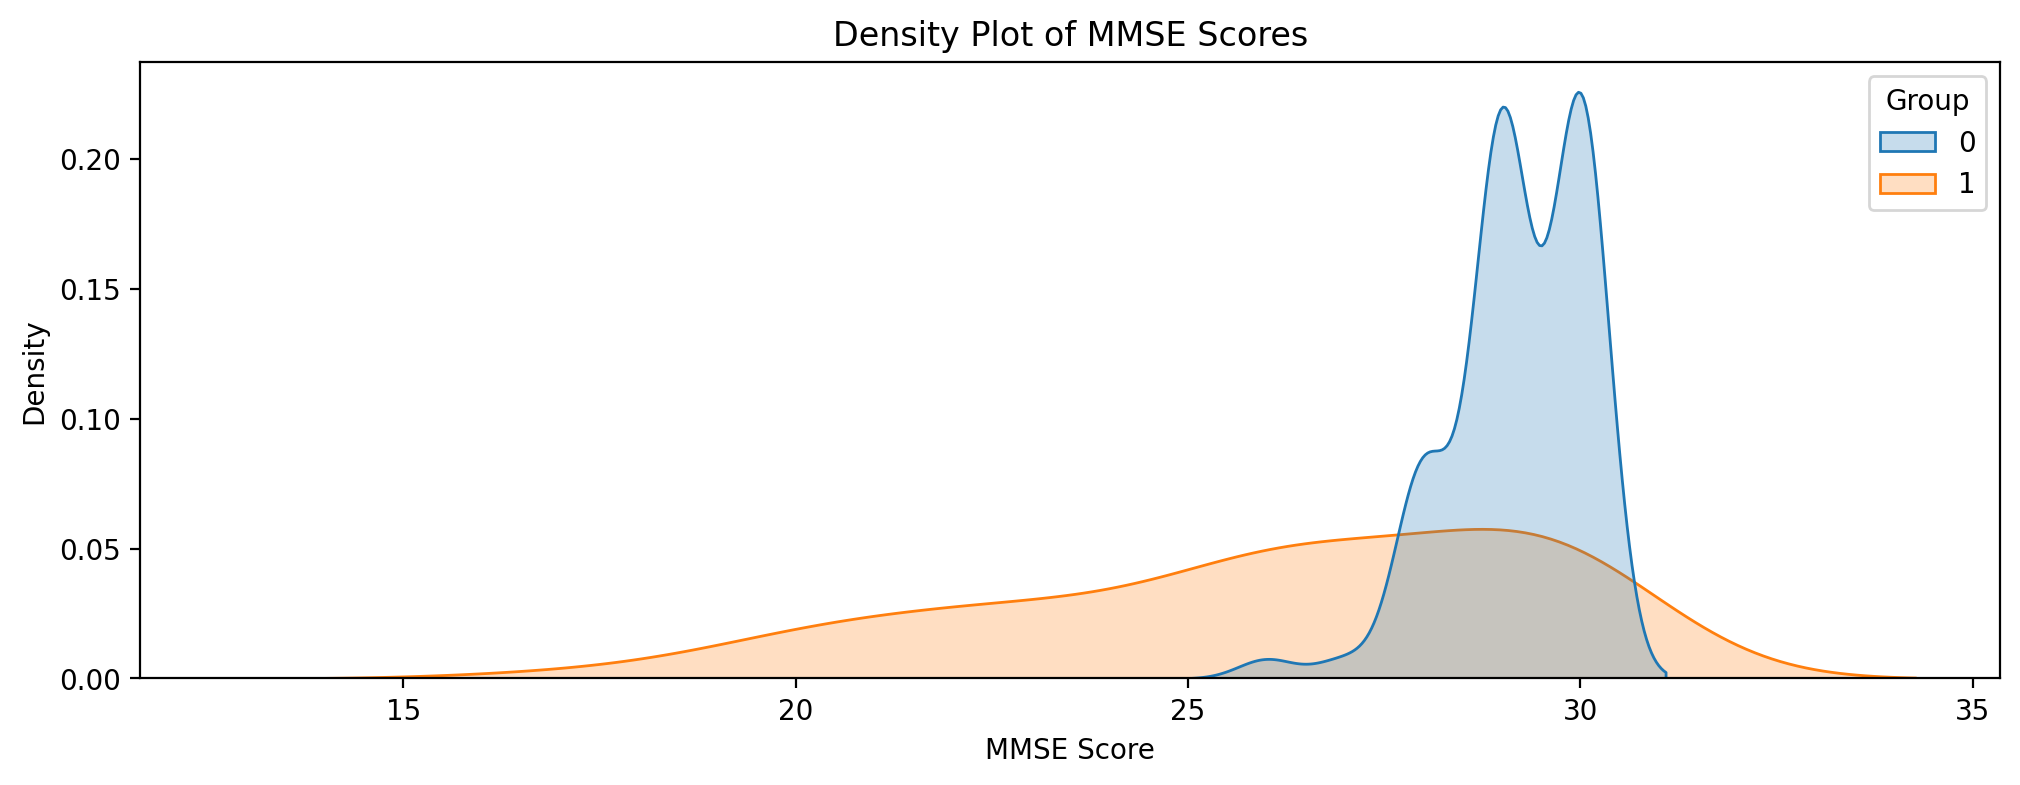

In [26]:
plt.figure(figsize=(12, 4))
sns.kdeplot(data=df, x='MMSE', fill=True, hue='Group')
plt.xlabel('MMSE Score')
plt.ylabel('Density')
plt.title('Density Plot of MMSE Scores')
plt.xlabel('MMSE Score')
plt.ylabel('Density');

Above graph shows that individuals who had dementia had much lower *MMSE scores than individuals without dementia. 

**__MMSE__: A widely used screening tool for cognitive impairment. Scores range from 1 to 30 with higher scores indicating better cognitive function. The examination assesses domains such as orientation, memory, attention, and language.*

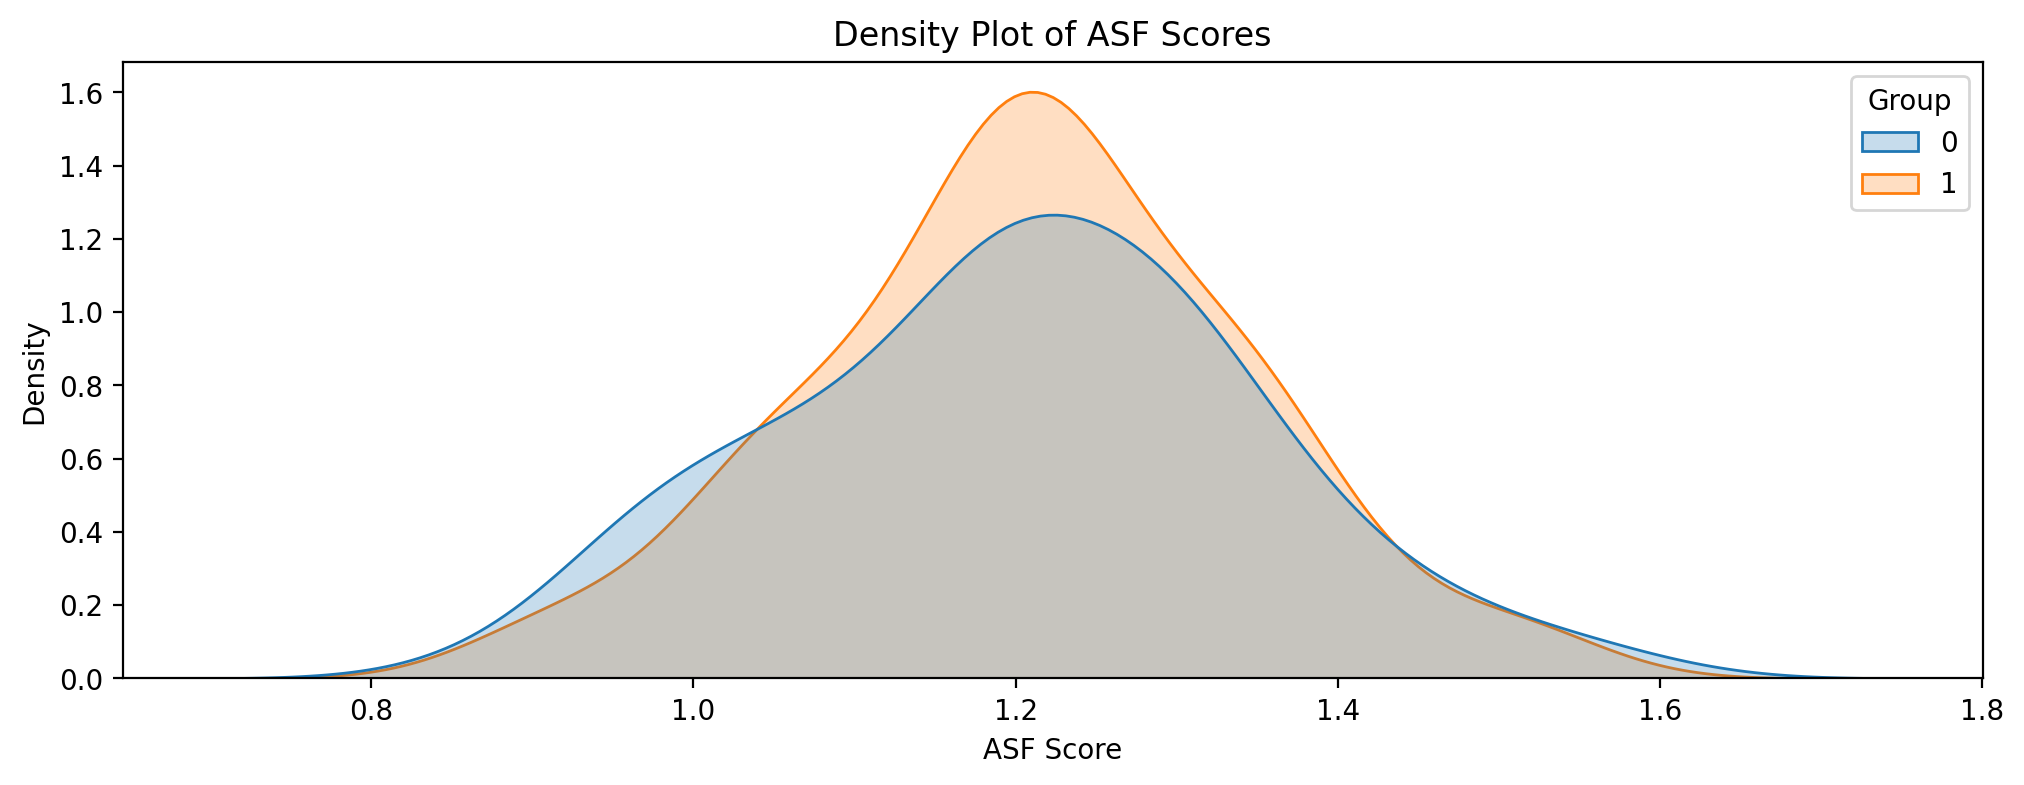

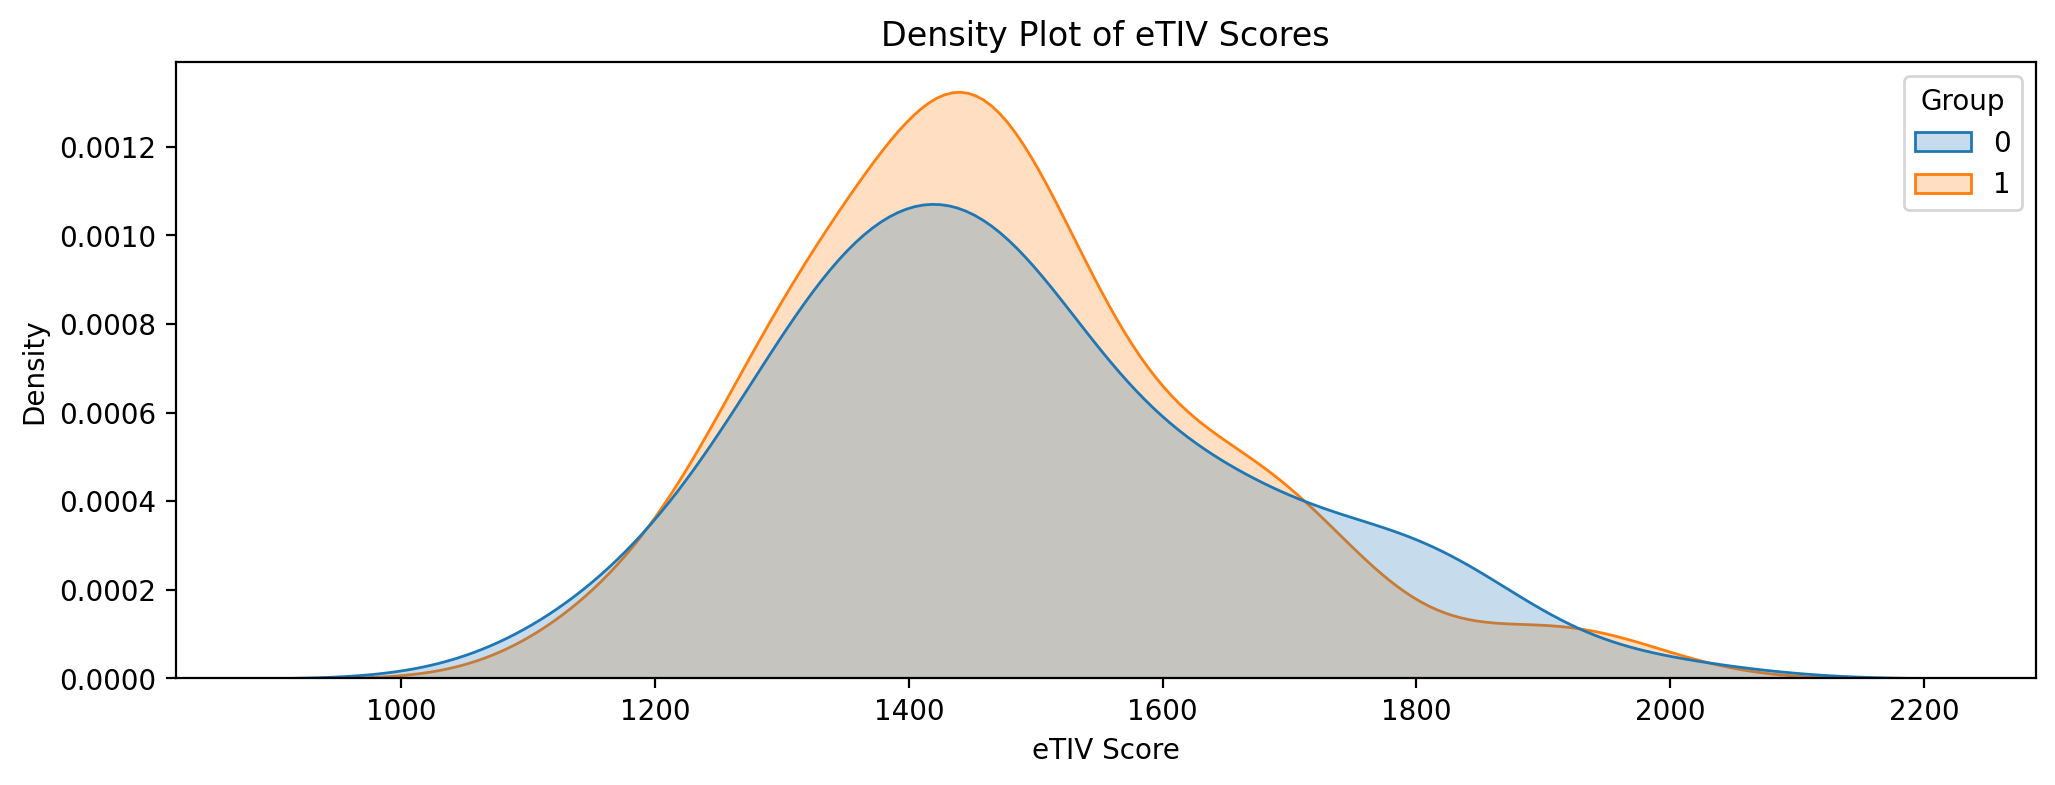

In [27]:
plt.figure(figsize=(12, 4))
sns.kdeplot(data=df, x='ASF', fill=True, hue='Group')
plt.xlabel('ASF Score')
plt.ylabel('Density')
plt.title('Density Plot of ASF Scores')
plt.xlabel('ASF Score')
plt.ylabel('Density');

plt.figure(figsize=(12, 4))
sns.kdeplot(data=df, x='eTIV', fill=True, hue='Group')
plt.xlabel('eTIV Score')
plt.ylabel('Density')
plt.title('Density Plot of eTIV Scores')
plt.xlabel('eTIV Score')
plt.ylabel('Density');

In the above two graphs, we can observe that the distribution of *ASF and *eTIV scores between the groups are relatively similar. Note that these scores vary widely between individuals regardless of disease status. Unless new studies indicate that initial brain and skull size impact Alzheimer's risk, not much weight should be given to these variables. What should be examined, rather, is the nWBV since it represents the volume of the brain normalized to the subject's total volume inside the skull.

**__ASF__: A scaling factor used in brain imaging to adjust for individual differences in brain size and shape. It accounts for variability in brain morphology allowing for accurate comparisons of brain structures.*

**__eTIV__: Indicates the total volume inside the skull (including brain tissue, cerebrospinal fluid, etc.). It is measured in cubic centimeters (cc) and can help establish baseline brain size.*

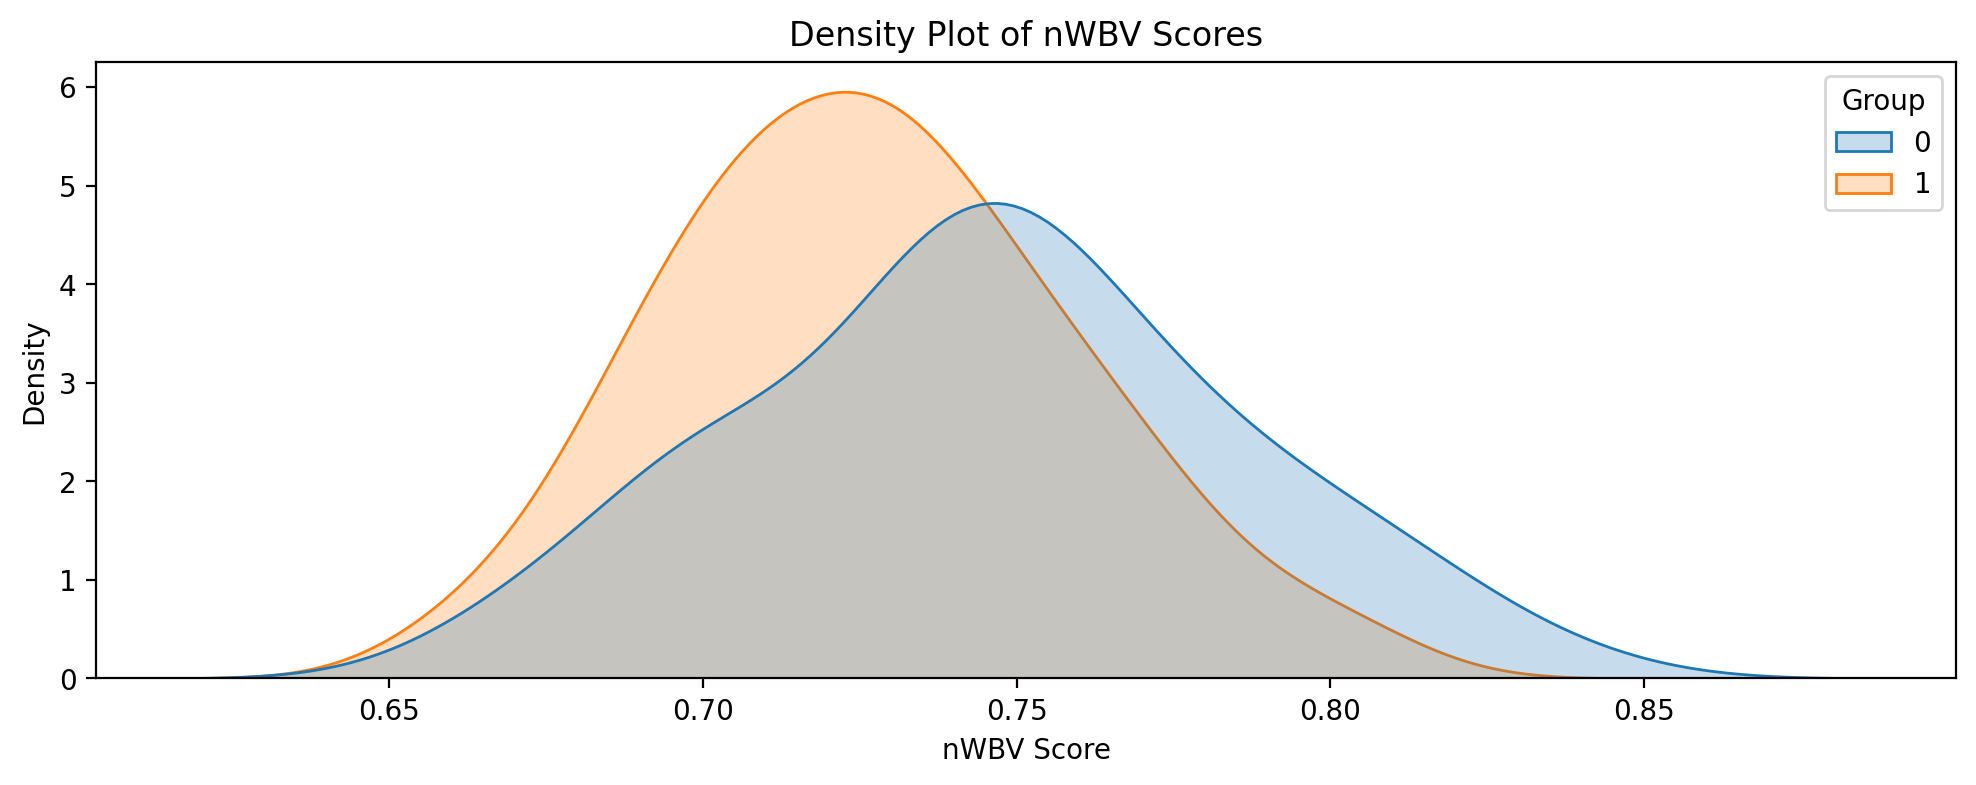

In [28]:
plt.figure(figsize=(12, 4))
sns.kdeplot(data=df, x='nWBV', fill=True, hue='Group')
plt.xlabel('nWBV Score')
plt.ylabel('Density')
plt.title('Density Plot of nWBV Scores')
plt.xlabel('nWBV Score')
plt.ylabel('Density');

The above graph indicates that based on the *nWBV scores, individuals with dementia had lower brain volume than individuals who did not have dementia. This is expected, since it is known that Alzheimer's disease causes brain tissue to shrink.

**__nWBV__: Represents the volume of the brain normalized to the subject's eTIV. It is expressed as a percentage, reflecting the proportion of the brain occupying the eTIV (nWBV = brain volume / eTIV). Changes in nWBV may be indicative of brain atrophy which is a common feature of Alzheimer's and dementia.*

# Results

## Exploratory Data Analysis

The main trends we noticed *within* our data: 
- higher SES is correlated with higher dementia severity
- highest age group (95-99 year olds) had the highest dementia severity but this wasn't a clear increasing pattern; some strange drop happens to people in their 80's
- females tended to make up more of the nondemented group, both genders were roughly equal in the demented group
- those who stopped their education prior to or in high school saw higher rates of dementia than those who went to college or higher education
- MMSE and nWBV were significantly different between the demented and nondemented groups (the demented group had a spread of lower MMSE, a cognitive exam, scores and lower brain volume as well)

Note that there may be confounding factors that are not accounted for in our dataset. For example, someone who is of a higher SES is likely to pursue higher education as well while both factors, when individually analyzed, would suggest opposite results. There may also be a factor such as some measure/marker of genetic predisposition which wasn't accounted for explicitly in our dataset that can affect someone's MMSE score or brain volume.

## Models

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from math import pi
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline


# Data Preprocessing

We load the Alzheimer's dataset and perform several preprocessing steps to prepare the data for modeling. This includes filling missing values for the socioeconomic status (SES) using the median, filtering the data to only include the first visit of each subject, converting categorical gender data to numeric, and encoding the target variable 'Group'. We also drop unnecessary columns to focus on features relevant for prediction.

In [52]:
# Load the dataset
df = pd.read_csv('oasis_longitudinal.csv')

# Preprocessing steps
df['SES'].fillna(df['SES'].median(), inplace=True)
df = df.loc[df['Visit'] == 1]
df['Gender'] = df['M/F'].map({'F': 0, 'M': 1})
df['Group'] = df['Group'].replace(['Converted', 'Demented', 'Nondemented'], [1, 1, 0])
df = df.drop(['Subject ID', 'MRI ID', 'Visit', 'Hand', 'M/F'], axis=1)

# Reset the index of the DataFrame
df = df.reset_index(drop=True)

# Feature Engineering

To enhance the model's ability to learn from the data, we create new features: an interaction term between age and education, the square of age, and bins for age. These engineered features aim to capture more complex relationships and patterns in the data that may improve model performance.

In [53]:
# Feature engineering
df['Age_EDUC_Interaction'] = df['Age'] * df['EDUC']
df['Age_squared'] = df['Age'] ** 2
age_bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
df['Age_binned'] = age_bins.fit_transform(df[['Age']])

# Define the features and the target
y = df['Group']
X = df.drop('Group', axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)


# Models

We define the target variable y and the feature matrix X, impute missing values, and split the dataset into training and test sets. Three models are trained: Logistic Regression, Random Forest, and Gradient Boosting. Each model's accuracy, precision, recall, and F1 score are calculated to evaluate their performance. The Gradient Boosting model, after optimization, shows the best results with the highest accuracy and precision, suggesting it's most effective in predicting Alzheimer's disease from this dataset.

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=141),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, min_samples_split=2, random_state=141)
}

# Dictionary to hold model performance
results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, predictions),
        'Precision': precision_score(y_test, predictions),
        'Recall': recall_score(y_test, predictions),
        'F1 Score': f1_score(y_test, predictions)
    }

results = pd.DataFrame(results).T
results

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.800000,0.750000,0.750000,0.750000
Random Forest,0.766667,0.727273,0.666667,0.695652
Gradient Boosting,0.866667,1.000000,0.666667,0.800000


## Cross Validation

We employ cross-validation to assess the models' performance more robustly, ensuring the results are generalizable and not dependent on a particular train-test split. This approach confirms the Gradient Boosting model's superior performance across multiple subsets of the data.



In [73]:
# Prepare the full dataset with imputation (as missing values were found in SES)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Compare models using cross-validation
for name, model in models.items():
    # Wrap the model in a pipeline that includes imputation
    pipeline = make_pipeline(SimpleImputer(strategy='median'), model)
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    print(f"{name}: {cv_scores.mean()} ± {cv_scores.std()}")



Random Forest: 0.9 ± 0.036514837167011066
Gradient Boosting: 0.8733333333333333 ± 0.07717224601860152
SVM: 0.5133333333333333 ± 0.016329931618554516
XGBoost: 0.8666666666666668 ± 0.06324555320336757


The comparison of models reveals that the optimized Gradient Boosting model is the most effective for this task, demonstrating the value of ensemble methods and hyperparameter tuning in improving predictive performance. The significant precision of the optimized model indicates a low false positive rate, which is crucial in medical diagnostics.

## Gridsearch

Using Grid Search, we fine-tune the hyperparameters of the Gradient Boosting model. By systematically exploring a range of values for parameters like n_estimators, learning_rate, max_depth, and min_samples_split, we identify the combination that maximizes the model's accuracy. The best parameters indicate that a relatively slow learning rate with a moderate number of estimators and depth provides the best balance between bias and variance.



In [74]:
parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4]
}
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=141), parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 300}


Now, we will retrain our Gradient Boosting model with the parameters found in gridsearch

In [75]:
# Retrain the Gradient Boosting model with the best parameters found
optimized_gb = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=3,
    min_samples_split=2,
    n_estimators=100,
    random_state=141
)

optimized_gb.fit(X_train, y_train)

# Predict on the test set with the optimized model
optimized_predictions = optimized_gb.predict(X_test)

# Evaluate the optimized model
optimized_accuracy = accuracy_score(y_test, optimized_predictions)
optimized_precision = precision_score(y_test, optimized_predictions)
optimized_recall = recall_score(y_test, optimized_predictions)
optimized_f1 = f1_score(y_test, optimized_predictions)

print(f"Optimized Gradient Boosting - Accuracy: {optimized_accuracy}, Precision: {optimized_precision}, Recall: {optimized_recall}, F1 Score: {optimized_f1}")


Optimized Gradient Boosting - Accuracy: 0.8666666666666667, Precision: 1.0, Recall: 0.6666666666666666, F1 Score: 0.8


In [76]:
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting (Initial)', 'Gradient Boosting (Optimized)'],
    'Accuracy': [0.800, 0.800, 0.833, 0.867],  
    'Precision': [0.750, 0.800, 0.888, 1.0],  
    'Recall': [0.750, 0.666, 0.666, 0.666],  
    'F1 Score': [0.750, 0.727, 0.761, 0.8] 
}

# Convert dictionary to DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)


                           Model  Accuracy  Precision  Recall  F1 Score
0            Logistic Regression     0.800      0.750   0.750     0.750
1                  Random Forest     0.800      0.800   0.666     0.727
2    Gradient Boosting (Initial)     0.833      0.888   0.666     0.761
3  Gradient Boosting (Optimized)     0.867      1.000   0.666     0.800


The comparison of models reveals that the optimized Gradient Boosting model is the most effective for this task, demonstrating the value of ensemble methods and hyperparameter tuning in improving predictive performance. The significant precision of the optimized model indicates a low false positive rate, which is crucial in medical diagnostics.



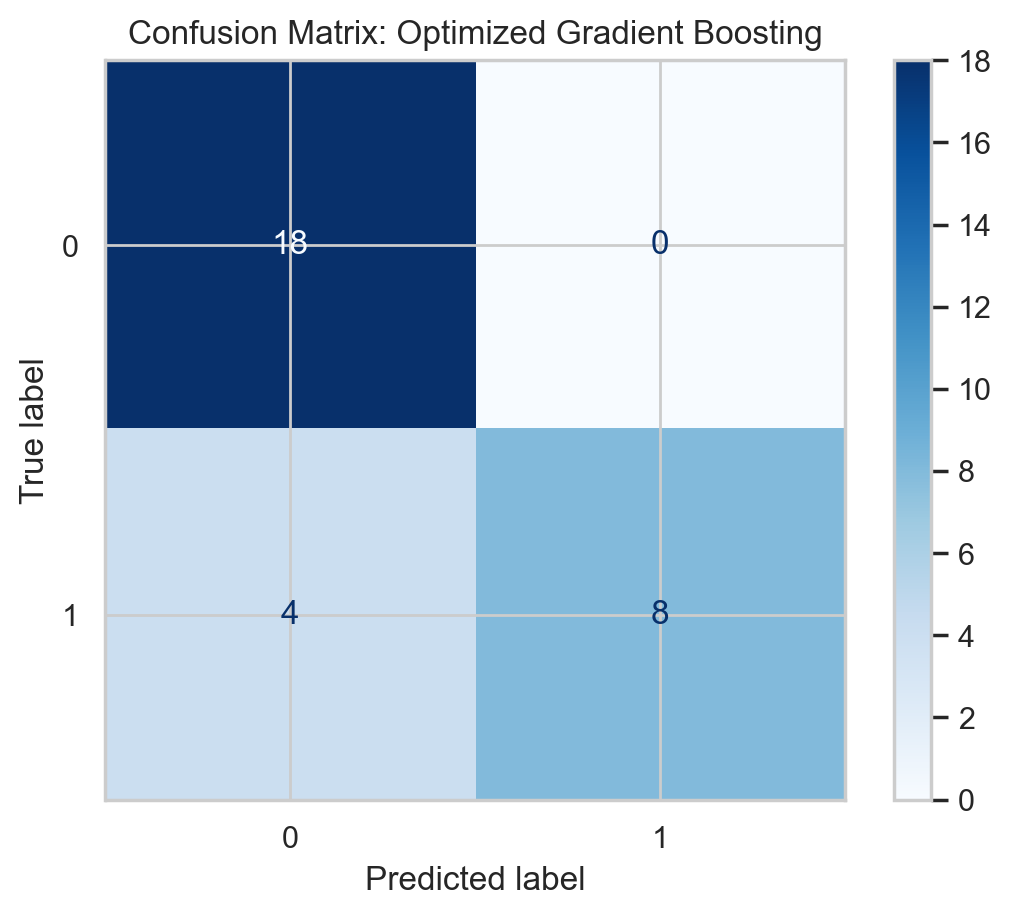

In [77]:
optimized_predictions = optimized_gb.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, optimized_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=optimized_gb.classes_)

# Display the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Optimized Gradient Boosting')
plt.show()

Above is a confusion matrix. It shows the number of correct and incorrect predictions broken down by each class. Here's what each part represents:

True Positives (TP): The model correctly predicted the positive class (e.g., correctly identified patients with Alzheimer's).

True Negatives (TN): The model correctly predicted the negative class (e.g., correctly identified patients without Alzheimer's).

False Positives (FP): The model incorrectly predicted the positive class (e.g., patients without Alzheimer's incorrectly identified as having it).

False Negatives (FN): The model incorrectly predicted the negative class (e.g., patients with Alzheimer's incorrectly identified as not having it).

This matrix helps understand the model's ability to classify correctly and where it might be making mistakes, offering insights into its performance beyond mere accura

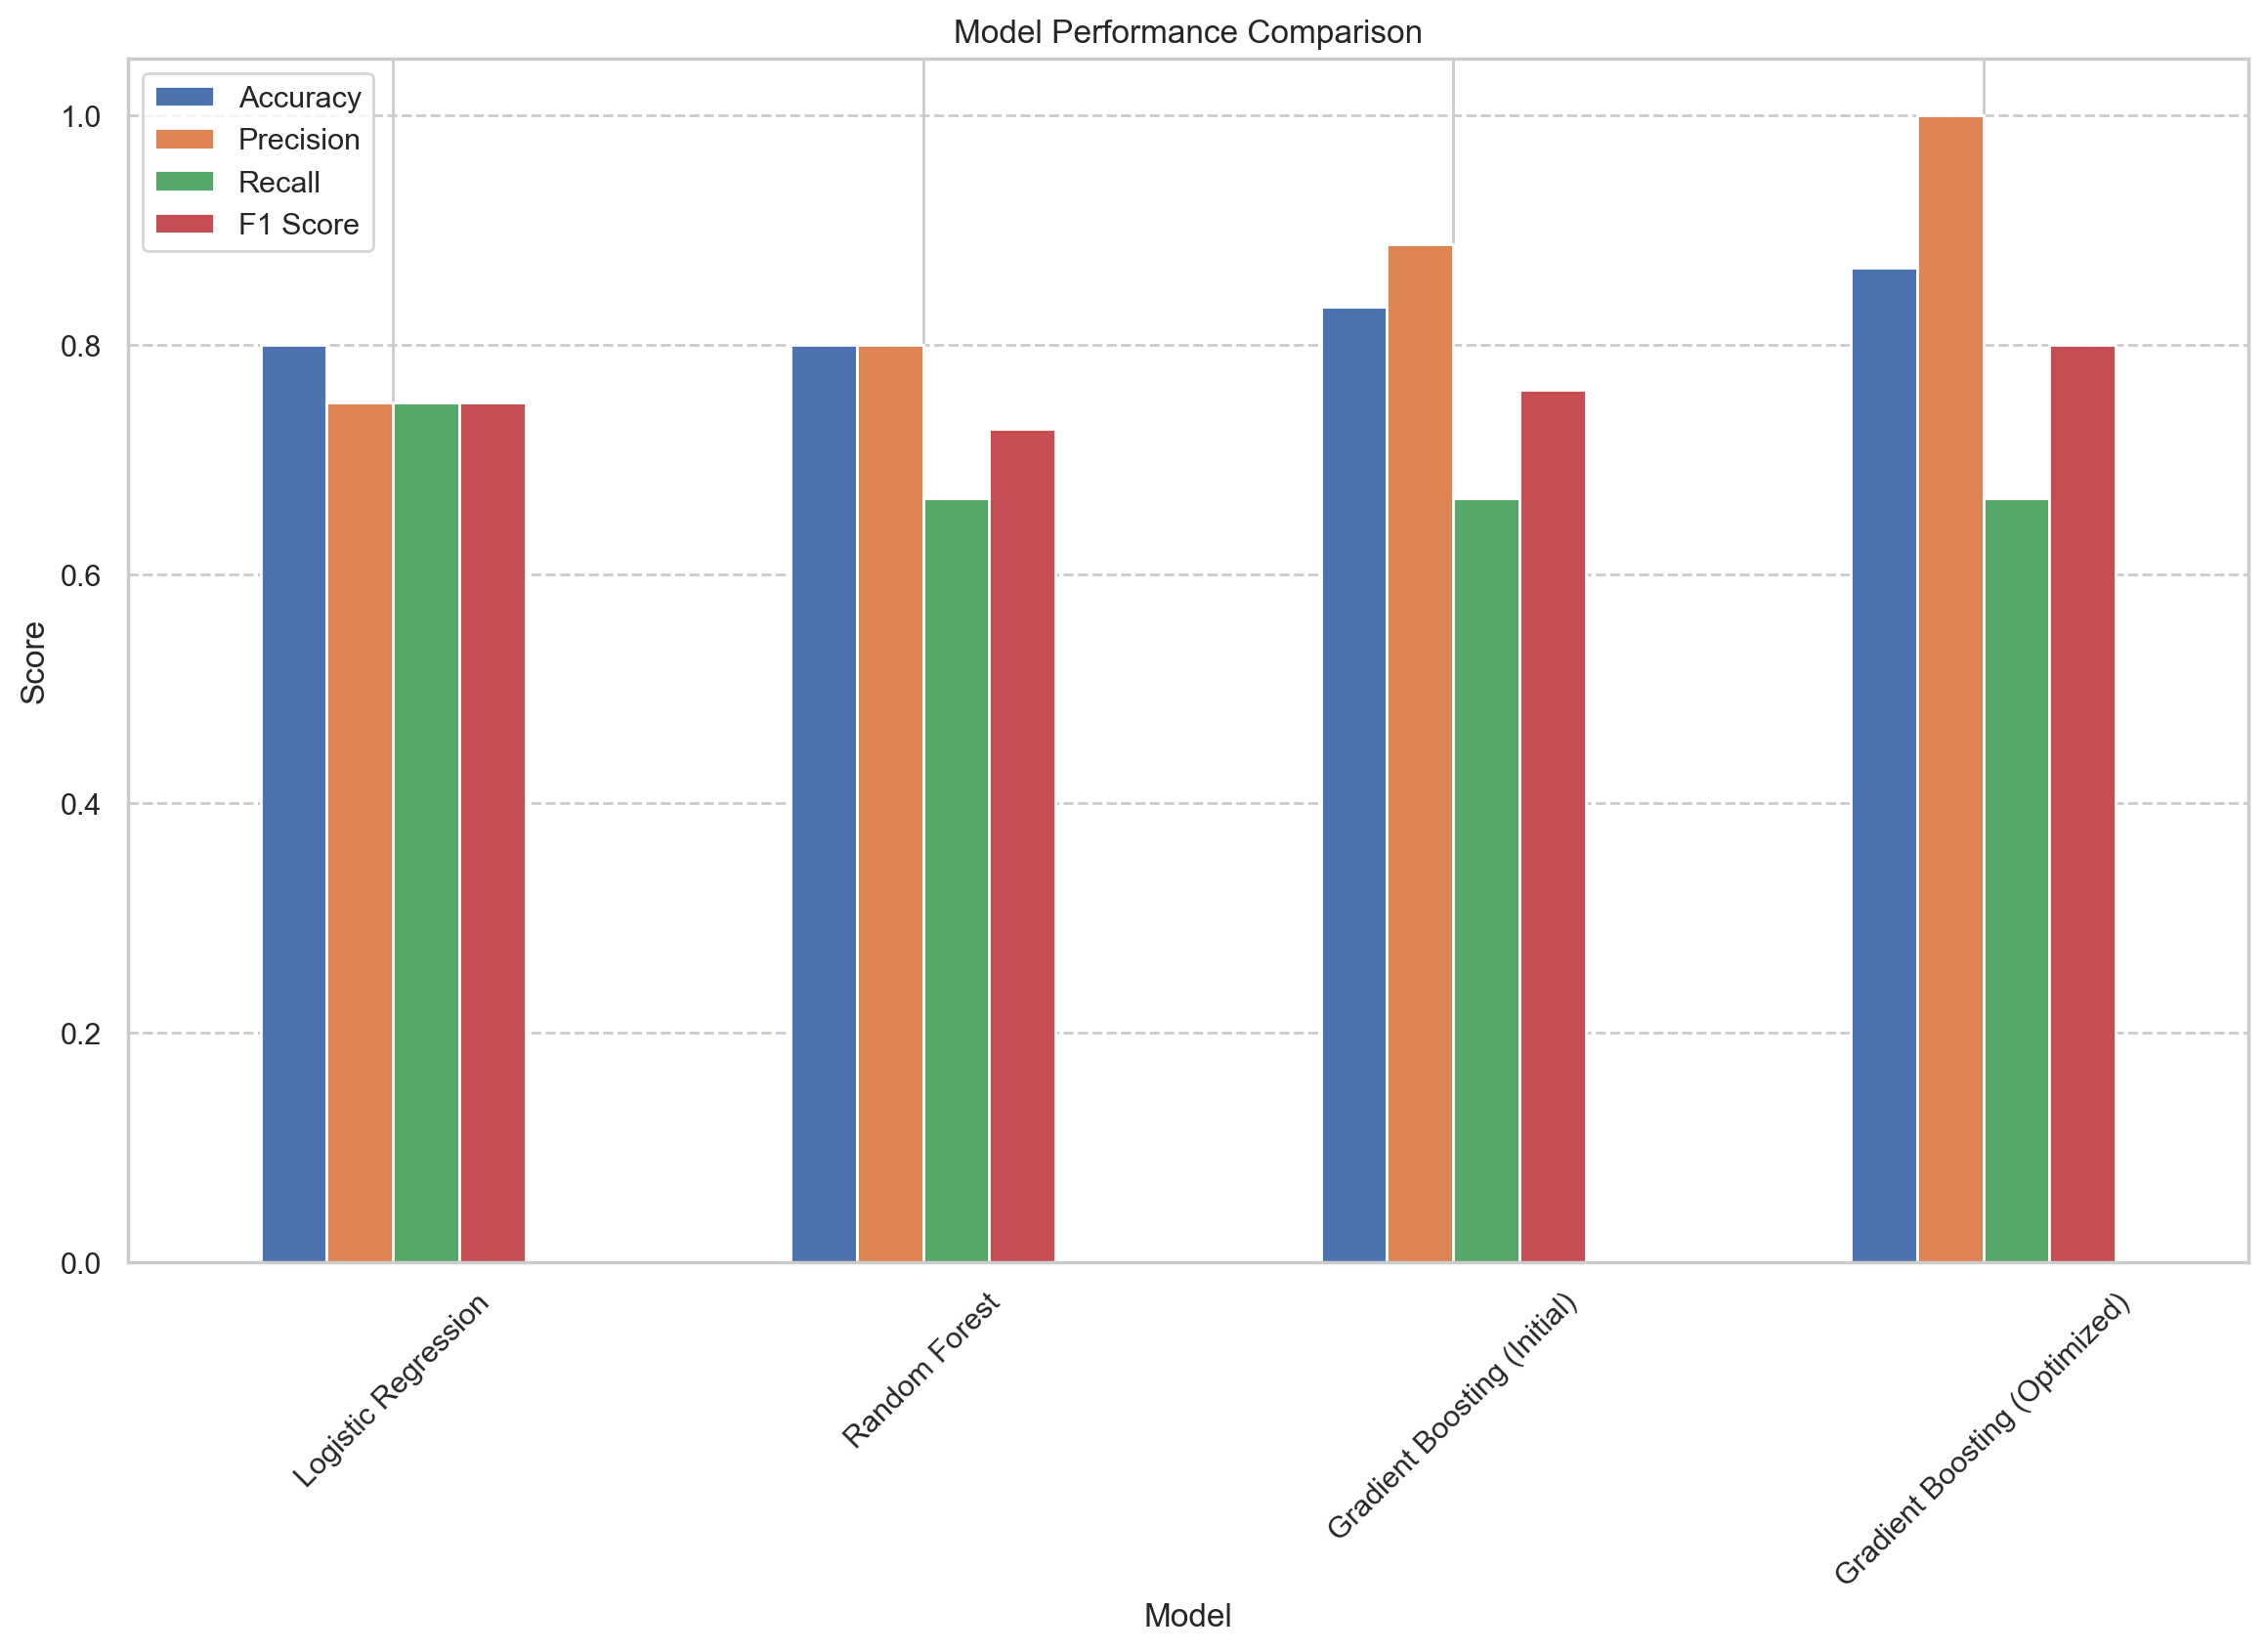

In [86]:
# Plotting accuracy, precision, recall, and F1 score for all models
if 'Model' in results_df.columns:
    results_df.set_index('Model', inplace=True)


results_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend(loc='upper left')
plt.show()

This chart compares the performance of different models based on several metrics: accuracy, precision, recall, and F1 score. Each bar represents a model, and the height of the bar indicates the score for each metric. This visualization enables a quick comparison across models to see which ones perform better on specific metrics:

Accuracy: The proportion of all predictions that were correct.
Precision: The proportion of positive identifications that were actually correct (important when the cost of FP is high).
Recall: The proportion of actual positives that were identified correctly (important when the cost of FN is high).
F1 Score: A harmonic mean of precision and recall, providing a single metric to assess balance between them.

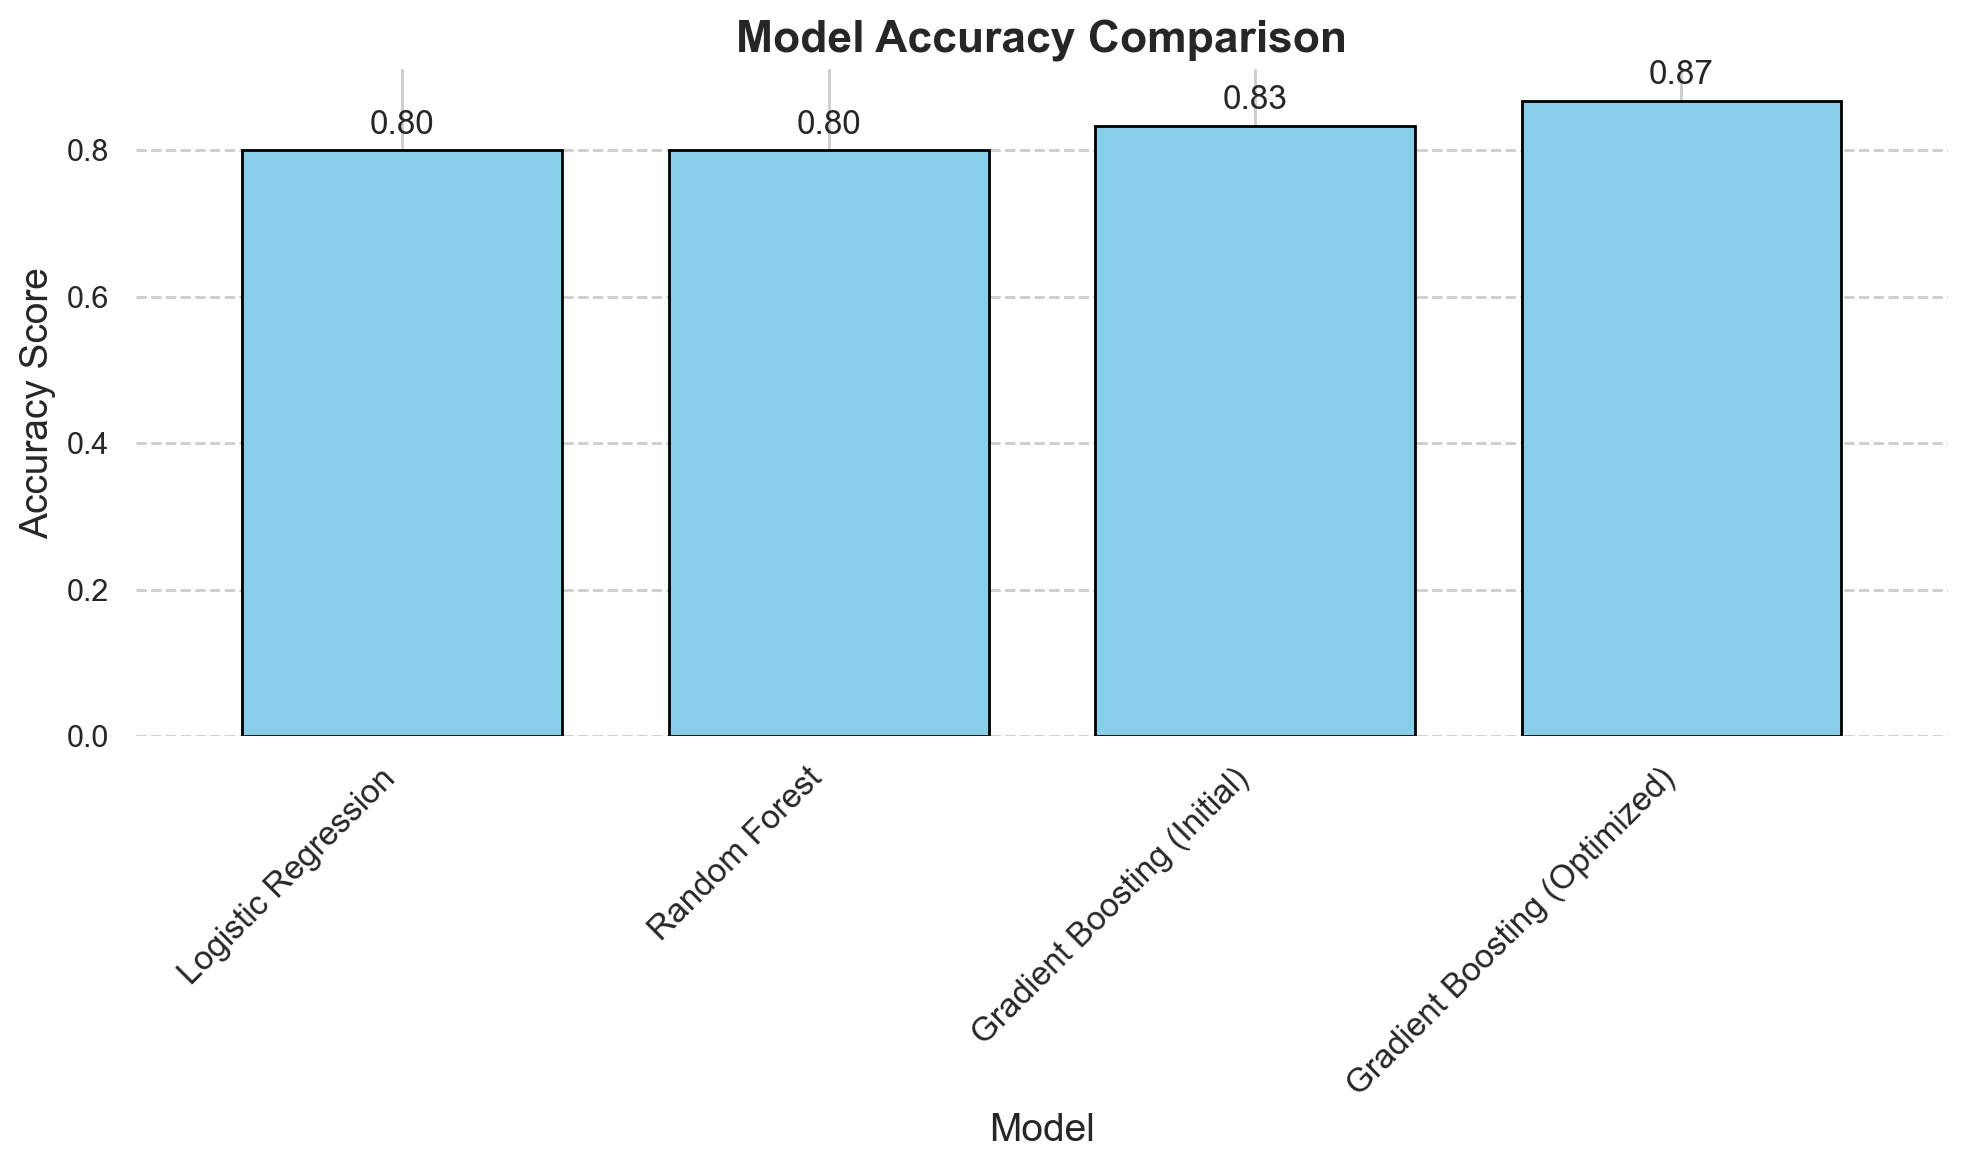

In [85]:
# Set the style
sns.set(style="whitegrid")

# Ensure the 'Model' column is set as the index for clear labeling
if 'Model' in results_df.columns:
    results_df.set_index('Model', inplace=True)

# Create the bar plot
ax = results_df['Accuracy'].plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black', width=0.75)

# Title and labels
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)  # Adjust the rotation and alignment of x-ticks

# Add grid but remove the frame
plt.grid(axis='y', linestyle='--')
sns.despine(top=True, right=True, left=True, bottom=True)

# Add labels above the bars for clarity
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points', fontsize=12)


# Show the plot
plt.tight_layout()
plt.show()


This focused chart provides a direct comparison of model accuracies. Each bar represents a different model, and the height shows its accuracy score. In the context of predicting Alzheimer's disease using machine learning models, "accuracy" refers to the proportion of all predictions that the model got right. It is calculated as the number of correct predictions divided by the total number of predictions made. 

# Ethics & Privacy

Ethics & Privacy Considerations:
The pursuit of developing a predictive model for Alzheimer's disease using clinical data entails several ethical and privacy considerations that must be carefully addressed throughout the research process. By examining potential biases, privacy concerns, and equitable impacts, our team aims to conduct responsible and ethical research that upholds participant confidentiality and promotes fair and inclusive outcomes.

Biases/Privacy/Terms of Use Issues with Proposed Data:

1. The datasets under consideration, including OASIS MRI, UK Biobank, and NACC, present various challenges related to biases and privacy. For instance, the terms of use and participant selection criteria in the OASIS MRI project may introduce biases, impacting the generalizability of findings. Similarly, while UK Biobank offers extensive data, its sample may lack diversity, potentially skewing results. Moreover, variations in data collection methods across research centers, as seen in NACC, could affect standardization and introduce biases.

Detection and Mitigation of Biases:

2. To address biases effectively, our team will conduct a rigorous review of dataset sources, scrutinizing participant demographics and recruitment procedures. During data preprocessing, variables will be carefully analyzed for potential biases, and efforts will be made to ensure a balanced representation across demographic groups. Collaboration with domain experts and external stakeholders will provide valuable input for validating the fairness and inclusivity of the dataset. 

Other Issues Related to Privacy and Equitable Impact:

3. Privacy considerations are paramount, given the sensitive nature of medical data involved in Alzheimer's research. Protecting participant anonymity and adhering to privacy regulations will be prioritized throughout the research process. Additionally, equitable impact assessments will be conducted to understand how the model's predictions may affect different demographic groups. Responsible communication of findings will be emphasized to avoid reinforcing existing biases or stigmatizing specific populations.

Handling Identified Issues:

5.  Transparent communication of identified biases will be integral to our research approach. Mitigation strategies will be implemented during data preprocessing and model development stages to address any biases detected. If persistent biases persist despite mitigation efforts, alternative datasets or additional sampling methods will be considered. Ethical review boards will be consulted to ensure adherence to ethical guidelines, and findings will be disseminated with clear acknowledgments of potential limitations and biases, promoting responsible and equitable use of the predictive model.

In summary, our research endeavors to uphold ethical principles and privacy standards, prioritizing participant confidentiality and fair representation of diverse populations. Transparency, collaboration, and continuous evaluation will guide our efforts to develop an Alzheimer's prediction model that serves the interests of both science and society while mitigating potential risks and biases.


# Discusison and Conclusion

In this study, we embarked on a journey to develop a predictive model for Alzheimer's disease based on clinical data, aiming to contribute to early diagnosis and intervention efforts for this prevalent neurodegenerative condition. Our work builds upon the backdrop of a global aging population and the increasing burden of age-related diseases, such as Alzheimer's, highlighting the pressing need for accurate and accessible diagnostic tools.

Drawing from the background literature, which elucidated the rising prevalence of Alzheimer's disease and the challenges associated with its diagnosis and management, we identified an opportunity to leverage machine learning techniques to improve predictive accuracy. Previous studies, including those focusing on cardiovascular disease and eye diseases, have demonstrated the efficacy of machine learning in disease prediction, providing a solid foundation for our endeavor.

Our analysis of two NIH-published studies showcased the potential of machine learning models in predicting early-stage Alzheimer's disease and diagnosing dementia, underscoring the significance of advanced data analytics in healthcare applications. These studies employed diverse methodologies, from leveraging imaging data to utilizing cognitive function tests, highlighting the versatility of machine learning in addressing complex healthcare challenges across different populations and contexts.

Furthermore, our exploration of Kaggle projects provided valuable insights into real-world applications of machine learning for Alzheimer's disease prediction. These projects emphasized the importance of data preprocessing, feature selection, and model evaluation in achieving accurate predictions, echoing the iterative nature of machine learning model development.

In conclusion, our study contributes to the growing body of research on Alzheimer's disease prediction using machine learning, offering a comprehensive analysis of prior work and exploring the feasibility of predictive modeling in clinical settings. Moving forward, further refinement of predictive algorithms, incorporation of diverse datasets, and validation through clinical trials are warranted to ensure the efficacy and reliability of machine learning-based diagnostic tools for Alzheimer's disease.

By integrating insights from previous research, leveraging advanced machine learning techniques, and critically evaluating predictive models, our study advances our understanding of Alzheimer's disease prediction and paves the way for future innovations in dementia diagnosis and management.

# Team Contributions

Speficy who did what.  This should be pretty granular, perhaps bullet points, no more than a few sentences per person.